# Fachprojekt Machine Learning
Authors: Anastasiia Korzhylova, Ivan Shishkin, Ramneek Agnihotri, Rodi Mehi

**Due date:** Wednesday, 12. June 2024

## Import necessary components

In [1]:
# Import the necessary libraries
import time
import torch, torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR, ExponentialLR, CosineAnnealingLR

# Import the VAE model and functions
import networks
from datasets import create_datasets
from evaluation import evaluate
from sampling import sample, plot_reconstruction

## Set hyperparameters, loss function and optimizing tools

In [4]:
# Hyperparameters
batch_size = 64 # Number of images per update of the network
num_epochs = 75 # One epoch means seeing every image of the training datasetSS
latent_dim = 128  # Size of the latent space
input_channels = 3  # CIFAR-10 images have 3 color channels
learning_rate = 0.0001 # Determines how drastically the parameters of the network change

# Select the device that will be used for training: GPU, if available, otherwise CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
print('=========================================')

# Put the neural network on the selected device
model = networks.VAE(input_channels, latent_dim)
model.to(device)

# Loss function
def loss_function(recon_x, x, mu, logvar):
    MSE = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return MSE + KLD

# Optimizer selection
optimizer_option = 'adamw'

optimizer = None
if optimizer_option == "adam":
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
elif optimizer_option == "adamw":
  optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
elif optimizer_option == "rmsprop":
  optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
else:
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Learning rate scheduler parameters
lr_schedule_option = 'cosine'

scheduler = None
if lr_schedule_option == 'step':
  scheduler = StepLR(optimizer, step_size=30, gamma=0.5)
elif lr_schedule_option == 'exponential':
  scheduler = ExponentialLR(optimizer, gamma=0.9)
elif lr_schedule_option == 'cosine':
  scheduler = CosineAnnealingLR(optimizer, T_max=50, eta_min=0.0001)

# Scaler for AMP
scaler = torch.cuda.amp.GradScaler()

Using device: cuda


## Choose a dataset for training

100%|██████████| 170498071/170498071 [00:13<00:00, 13097804.26it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


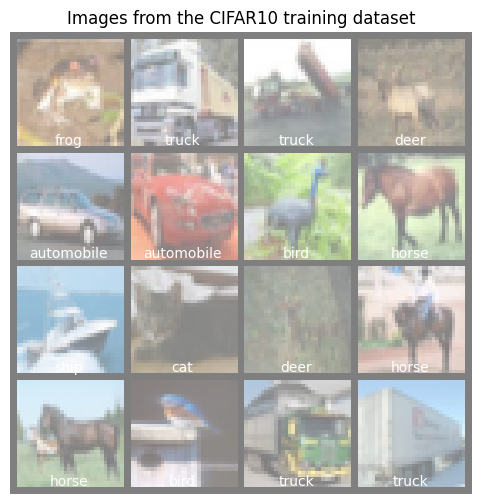

In [3]:
# Create and visualize the datasets for MNIST / CIFAR10
dataset_name = 'CIFAR10'
train_loader, test_loader = create_datasets(dataset_name, batch_size)

## Training loop

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 1, Mean Test Loss: 7815.609483852508, Learning Rate: 0.000100, Time: 10.99s


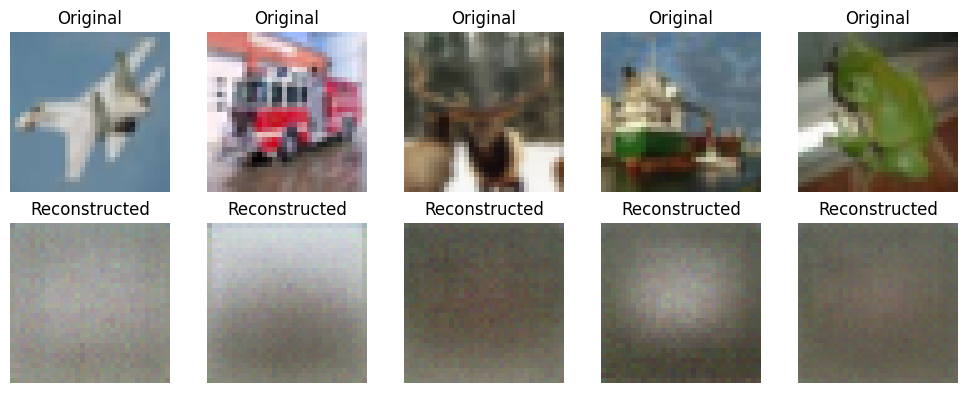

---------------------------------------------------------------------------------------------------
Epoch 2, Mean Test Loss: 7005.854957143212, Learning Rate: 0.000100, Time: 8.60s


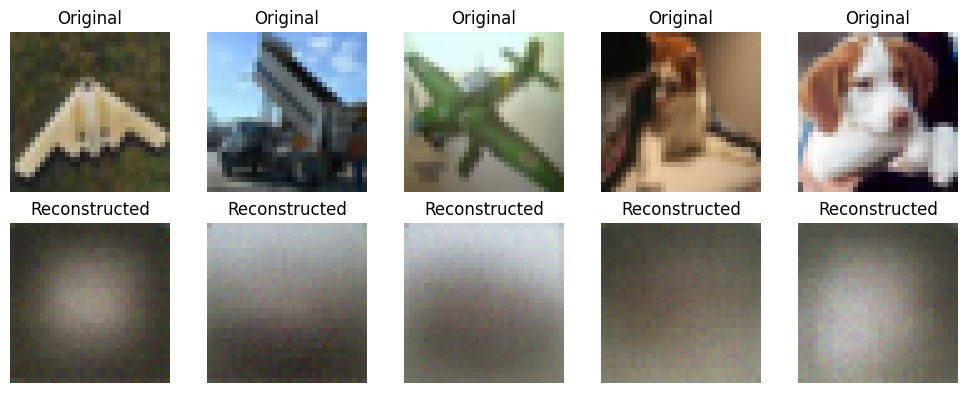

---------------------------------------------------------------------------------------------------
Epoch 3, Mean Test Loss: 6756.392994874602, Learning Rate: 0.000100, Time: 8.73s


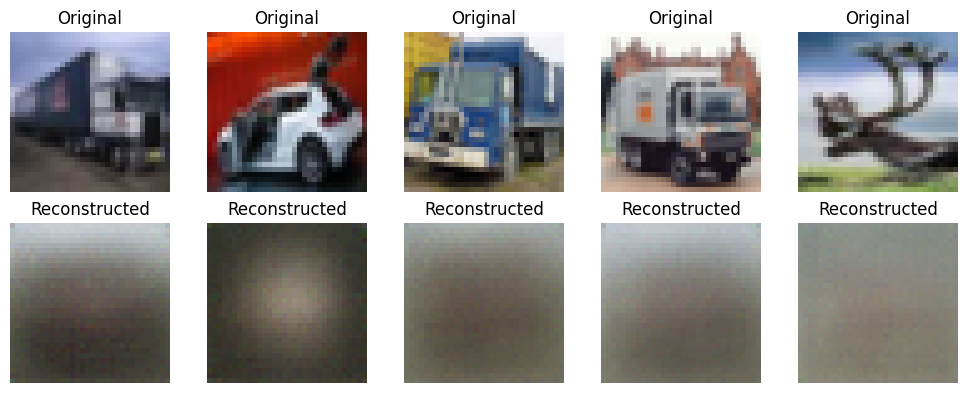

---------------------------------------------------------------------------------------------------
Epoch 4, Mean Test Loss: 6531.651127711983, Learning Rate: 0.000100, Time: 9.12s


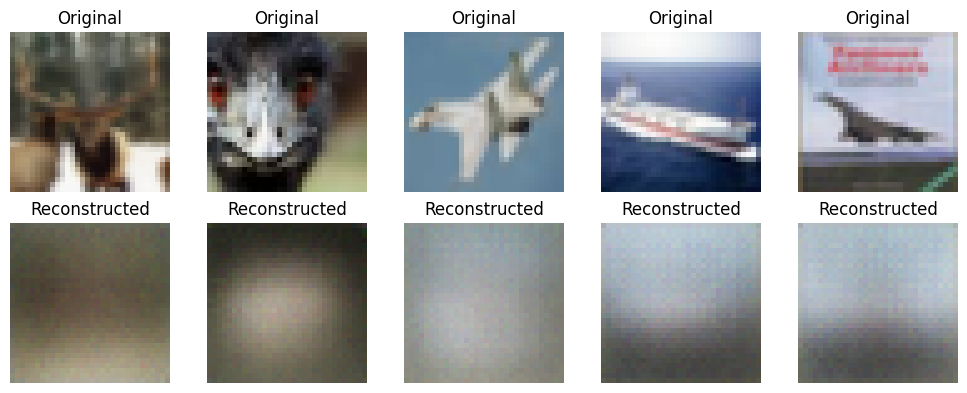

---------------------------------------------------------------------------------------------------
Epoch 5, Mean Test Loss: 6311.36937154782, Learning Rate: 0.000100, Time: 8.56s


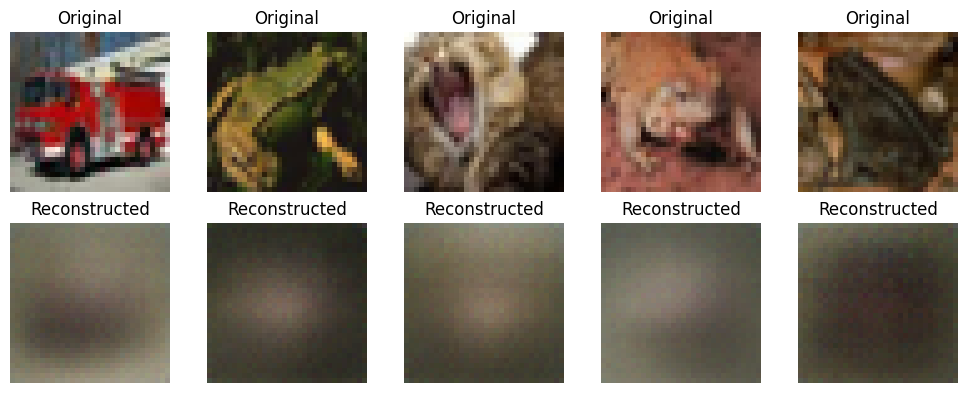

---------------------------------------------------------------------------------------------------
Epoch 6, Mean Test Loss: 6093.220019686753, Learning Rate: 0.000100, Time: 8.62s


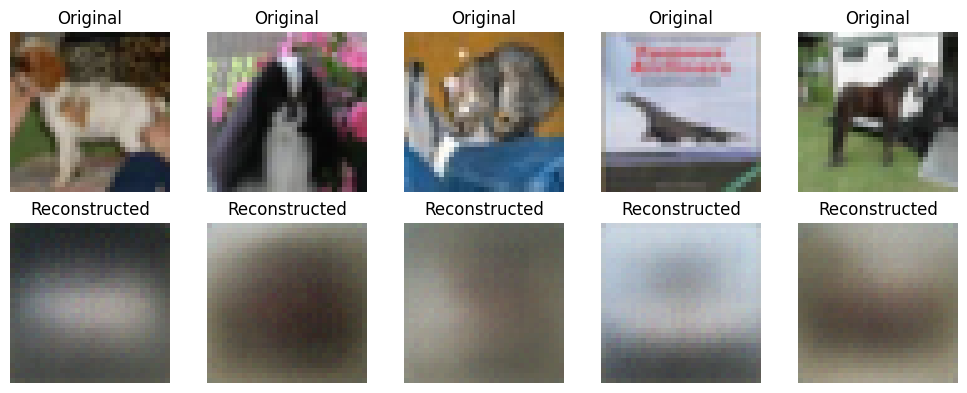

---------------------------------------------------------------------------------------------------
Epoch 7, Mean Test Loss: 6002.519909123706, Learning Rate: 0.000100, Time: 8.82s


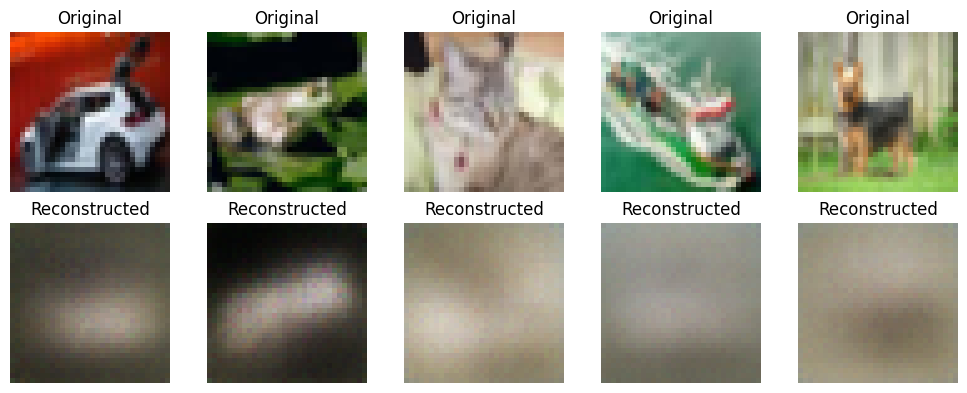

---------------------------------------------------------------------------------------------------
Epoch 8, Mean Test Loss: 5819.684086696358, Learning Rate: 0.000100, Time: 8.61s


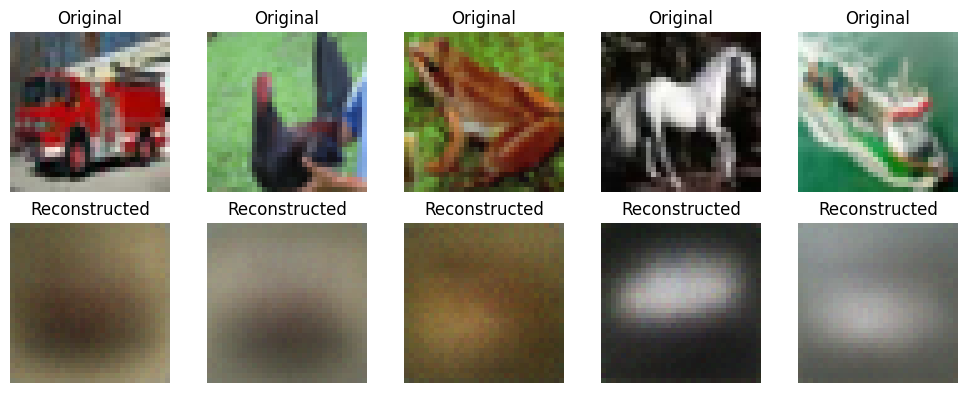

---------------------------------------------------------------------------------------------------
Epoch 9, Mean Test Loss: 5739.202198198646, Learning Rate: 0.000100, Time: 8.79s


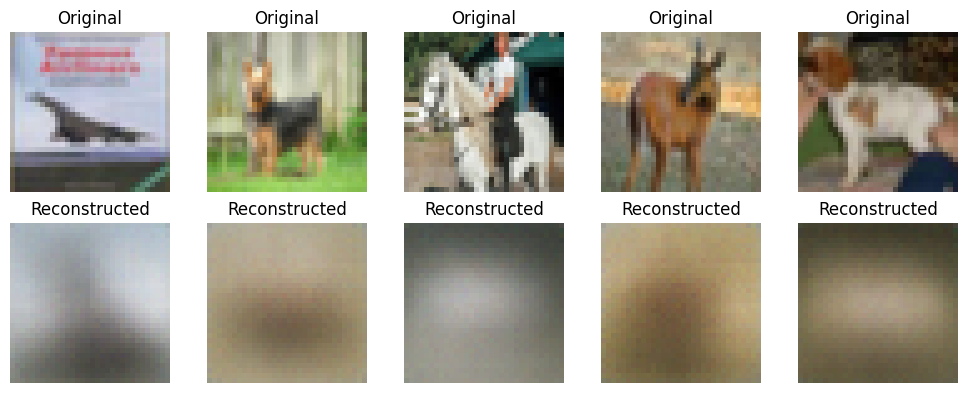

---------------------------------------------------------------------------------------------------
Epoch 10, Mean Test Loss: 5644.954684700935, Learning Rate: 0.000100, Time: 8.88s


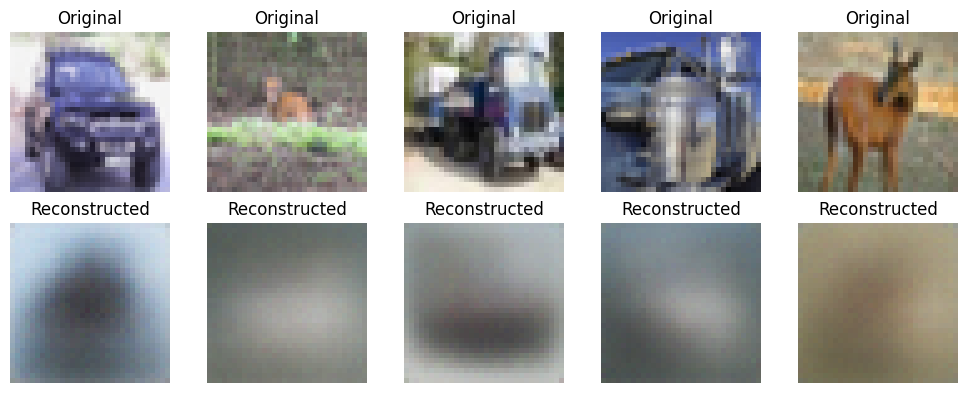

---------------------------------------------------------------------------------------------------
Epoch 11, Mean Test Loss: 5613.617486844397, Learning Rate: 0.000100, Time: 8.58s


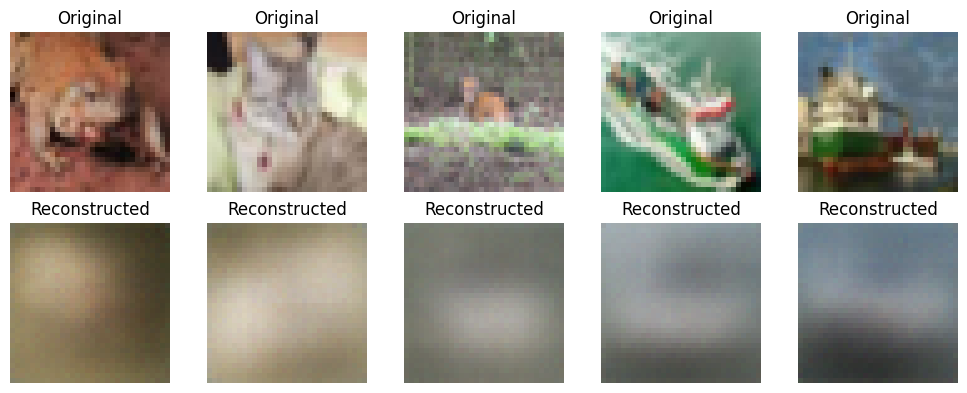

---------------------------------------------------------------------------------------------------
Epoch 12, Mean Test Loss: 5555.337508863704, Learning Rate: 0.000100, Time: 8.87s


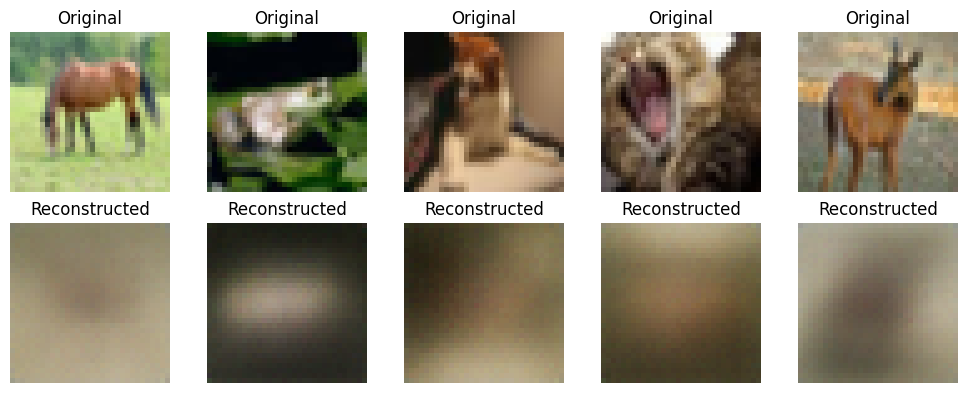

---------------------------------------------------------------------------------------------------
Epoch 13, Mean Test Loss: 5539.806829561853, Learning Rate: 0.000100, Time: 8.88s


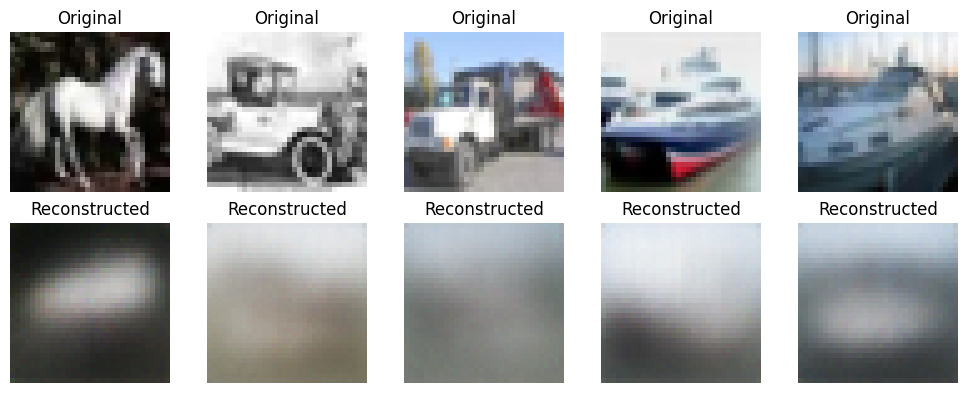

---------------------------------------------------------------------------------------------------
Epoch 14, Mean Test Loss: 5513.679941748358, Learning Rate: 0.000100, Time: 8.78s


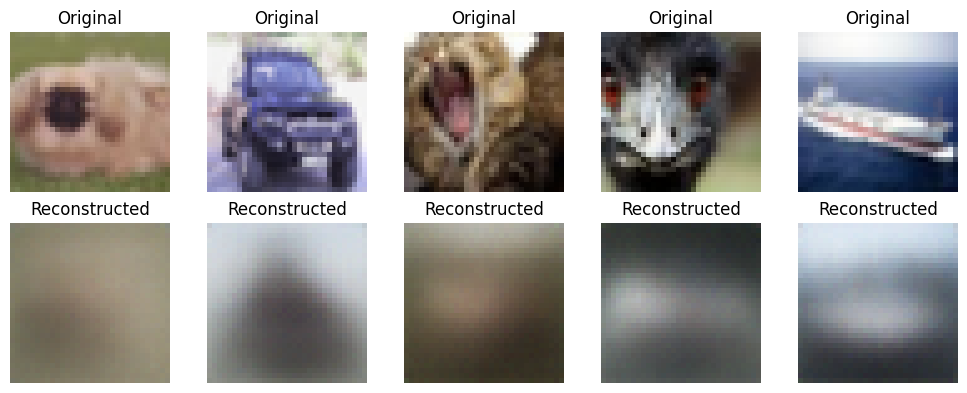

---------------------------------------------------------------------------------------------------
Epoch 15, Mean Test Loss: 5481.519770725517, Learning Rate: 0.000100, Time: 8.82s


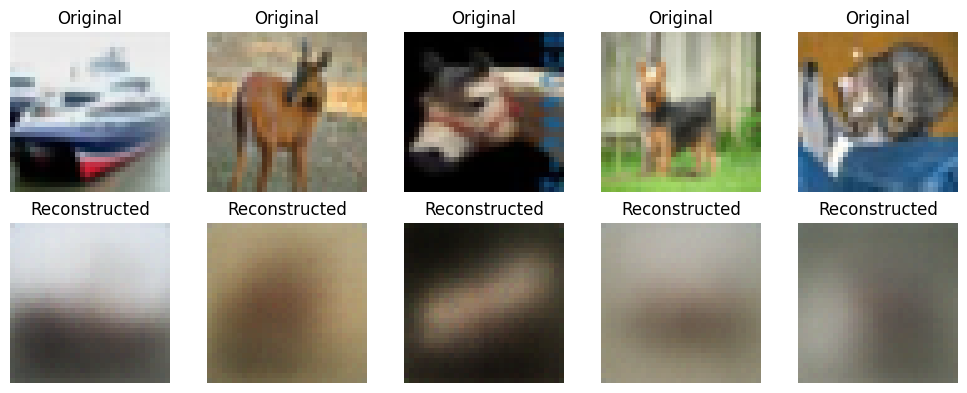

---------------------------------------------------------------------------------------------------
Epoch 16, Mean Test Loss: 5457.628403195909, Learning Rate: 0.000100, Time: 8.76s


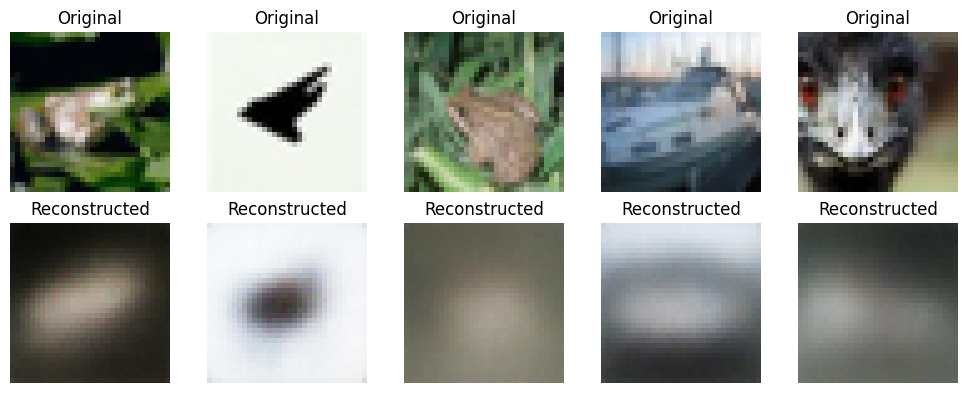

---------------------------------------------------------------------------------------------------
Epoch 17, Mean Test Loss: 5476.667300862112, Learning Rate: 0.000100, Time: 9.11s


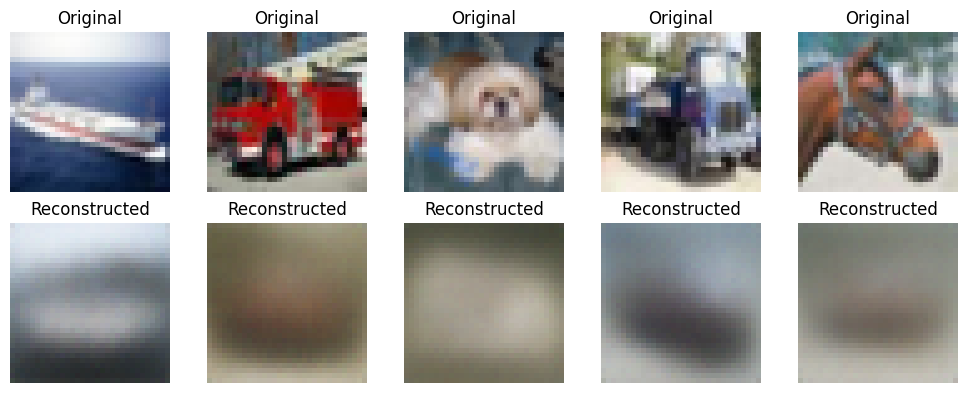

---------------------------------------------------------------------------------------------------
Epoch 18, Mean Test Loss: 5423.14787457703, Learning Rate: 0.000100, Time: 8.70s


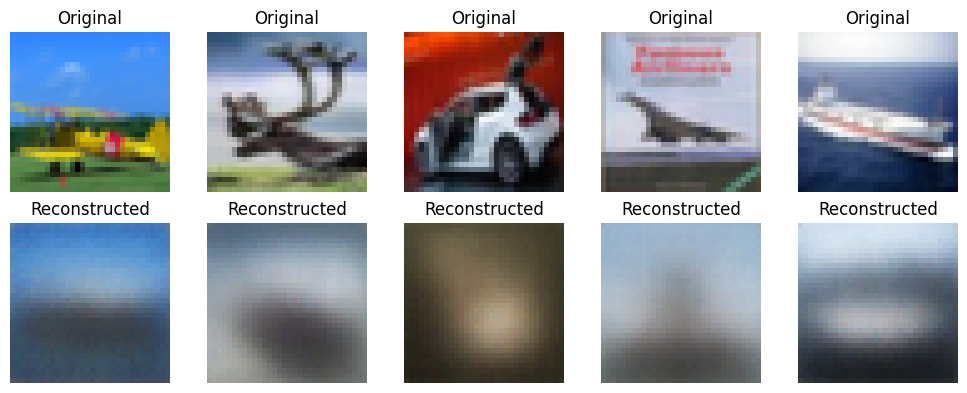

---------------------------------------------------------------------------------------------------
Epoch 19, Mean Test Loss: 5399.115329232185, Learning Rate: 0.000100, Time: 9.25s


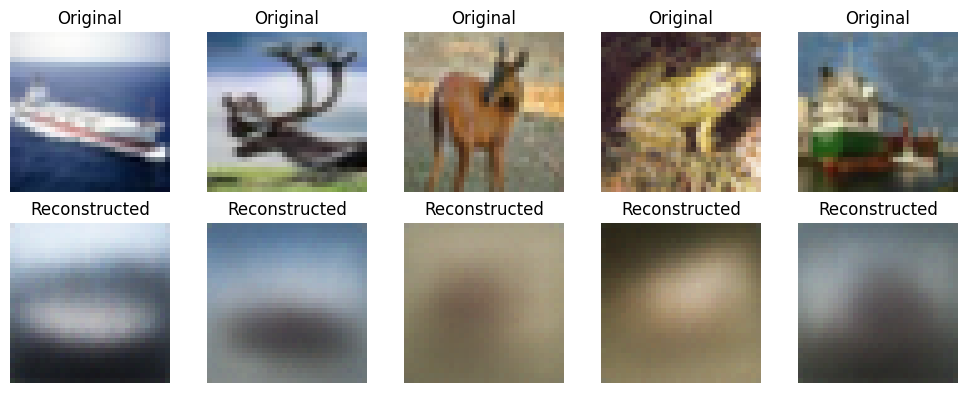

---------------------------------------------------------------------------------------------------
Epoch 20, Mean Test Loss: 5390.361827291501, Learning Rate: 0.000100, Time: 9.24s


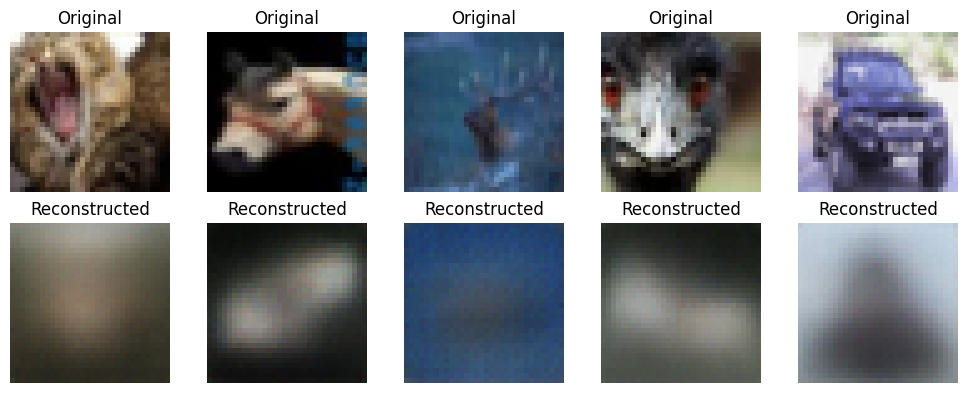

---------------------------------------------------------------------------------------------------
Epoch 21, Mean Test Loss: 5401.610160293093, Learning Rate: 0.000100, Time: 9.31s


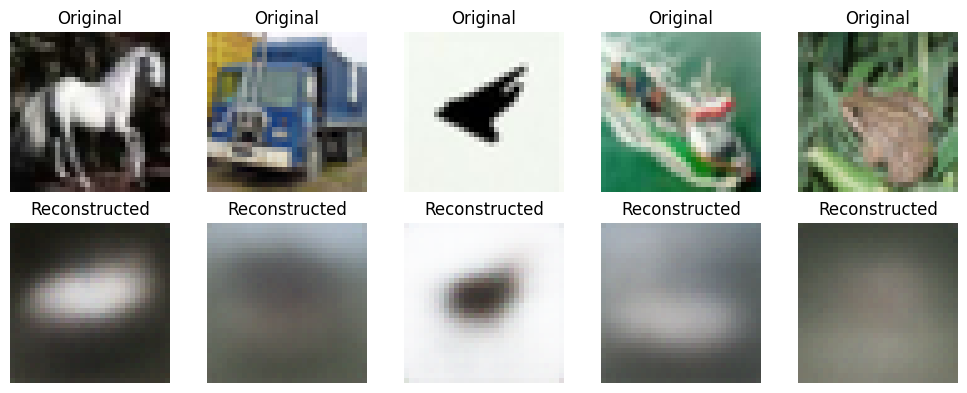

---------------------------------------------------------------------------------------------------
Epoch 22, Mean Test Loss: 5366.974282039958, Learning Rate: 0.000100, Time: 9.46s


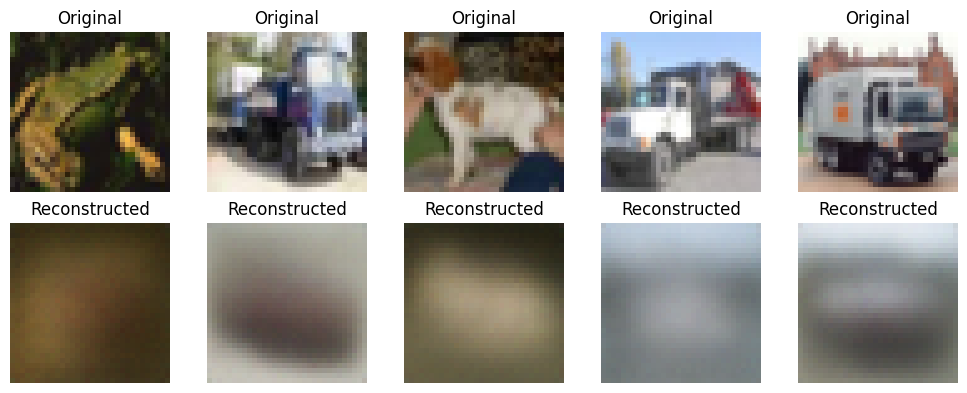

---------------------------------------------------------------------------------------------------
Epoch 23, Mean Test Loss: 5424.2673713052345, Learning Rate: 0.000100, Time: 9.20s


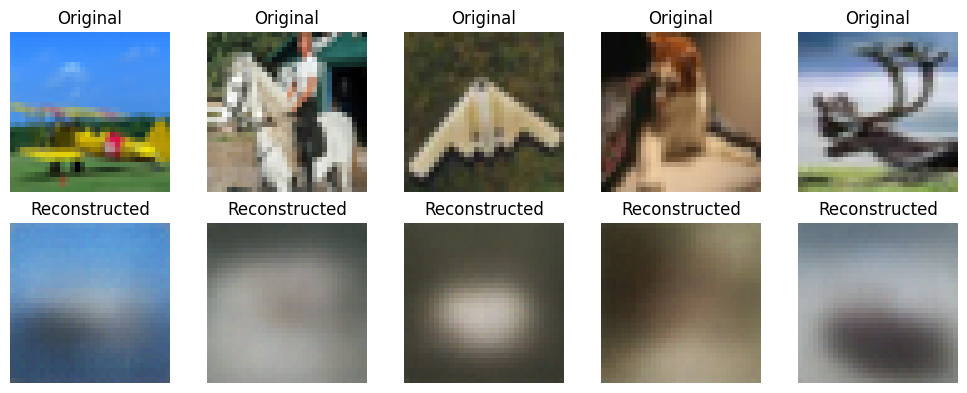

---------------------------------------------------------------------------------------------------
Epoch 24, Mean Test Loss: 5355.245530049512, Learning Rate: 0.000100, Time: 9.49s


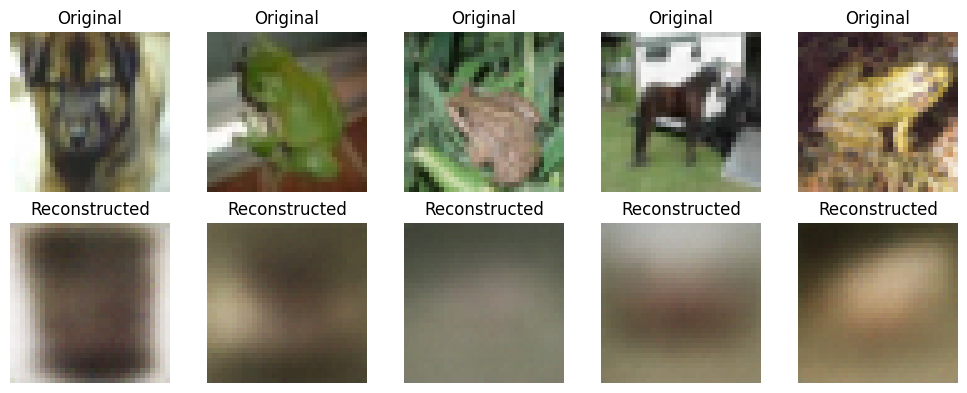

---------------------------------------------------------------------------------------------------
Epoch 25, Mean Test Loss: 5336.5782043068275, Learning Rate: 0.000100, Time: 8.77s


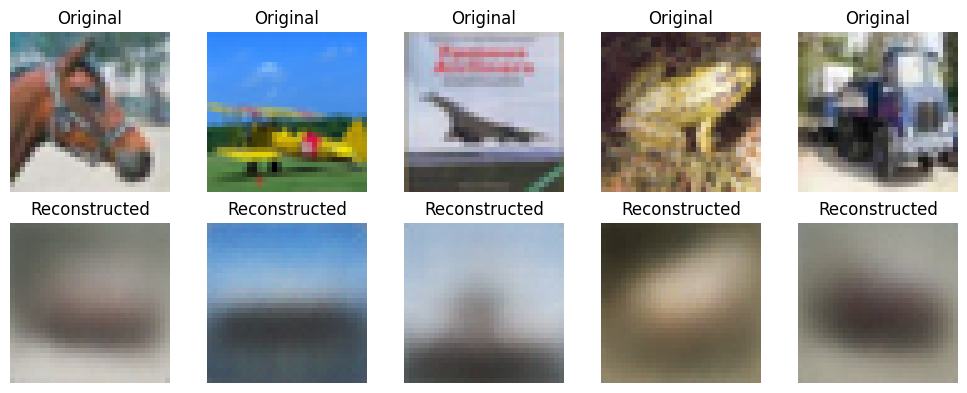

---------------------------------------------------------------------------------------------------
Epoch 26, Mean Test Loss: 5304.641827820213, Learning Rate: 0.000100, Time: 8.94s


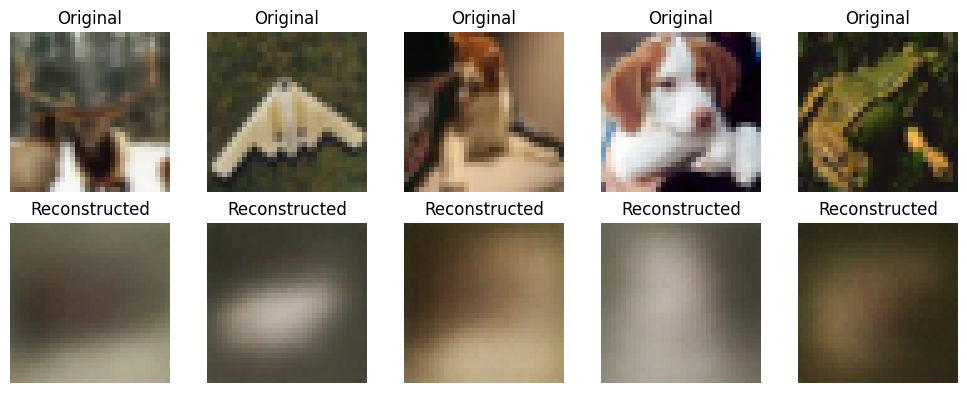

---------------------------------------------------------------------------------------------------
Epoch 27, Mean Test Loss: 5300.548625192824, Learning Rate: 0.000100, Time: 9.10s


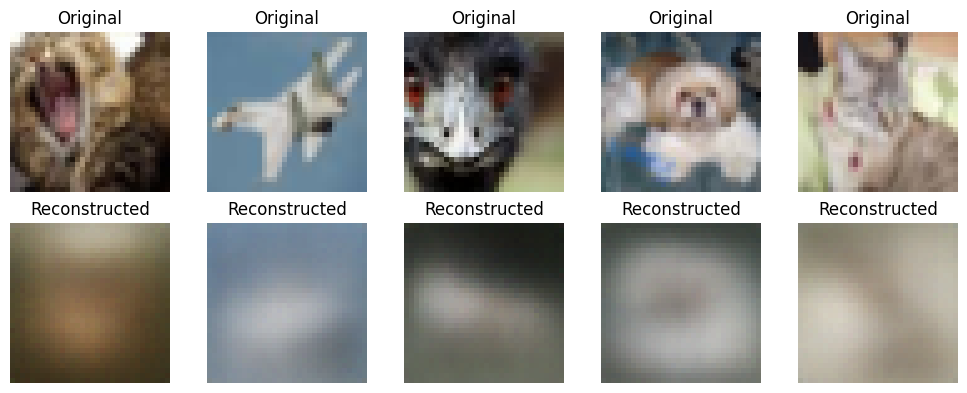

---------------------------------------------------------------------------------------------------
Epoch 28, Mean Test Loss: 5308.964367909037, Learning Rate: 0.000100, Time: 9.39s


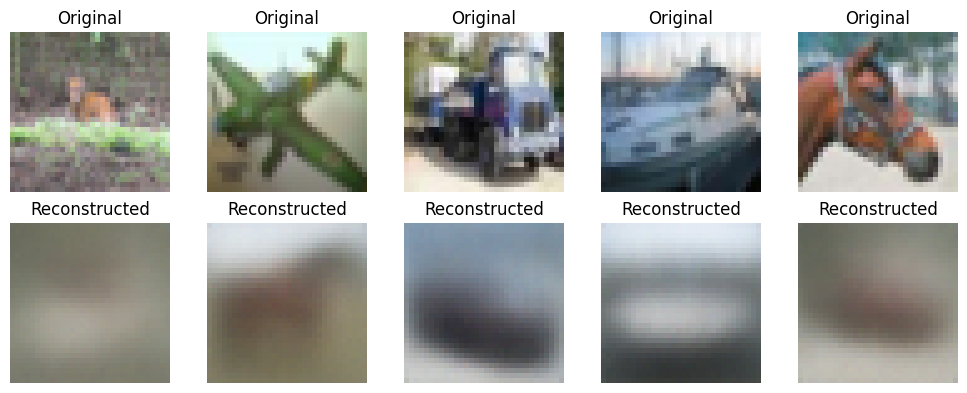

---------------------------------------------------------------------------------------------------
Epoch 29, Mean Test Loss: 5282.099048784584, Learning Rate: 0.000100, Time: 9.20s


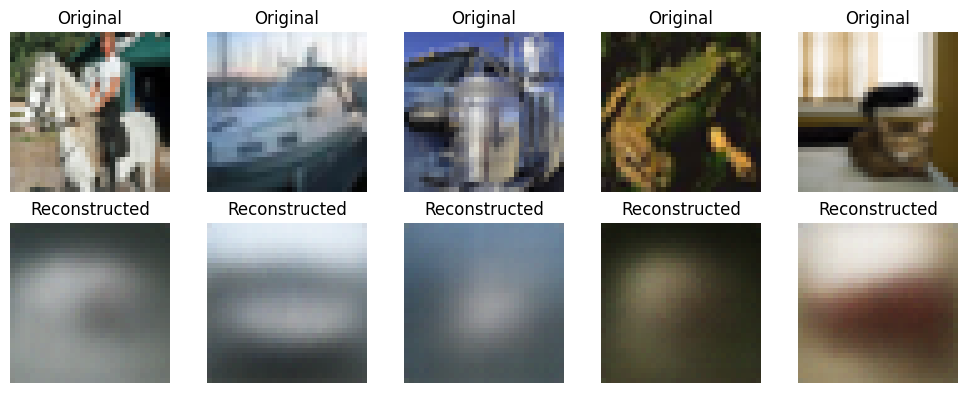

---------------------------------------------------------------------------------------------------
Epoch 30, Mean Test Loss: 5315.444877089968, Learning Rate: 0.000100, Time: 8.99s


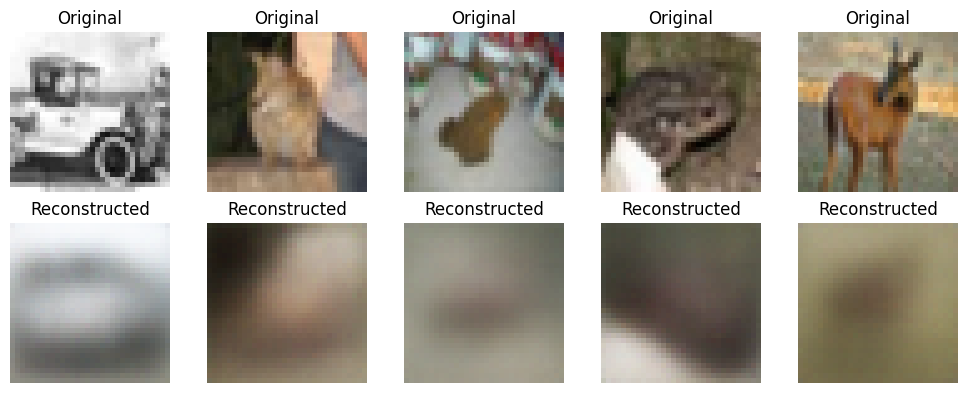

---------------------------------------------------------------------------------------------------
Epoch 31, Mean Test Loss: 5317.642487155404, Learning Rate: 0.000100, Time: 8.94s


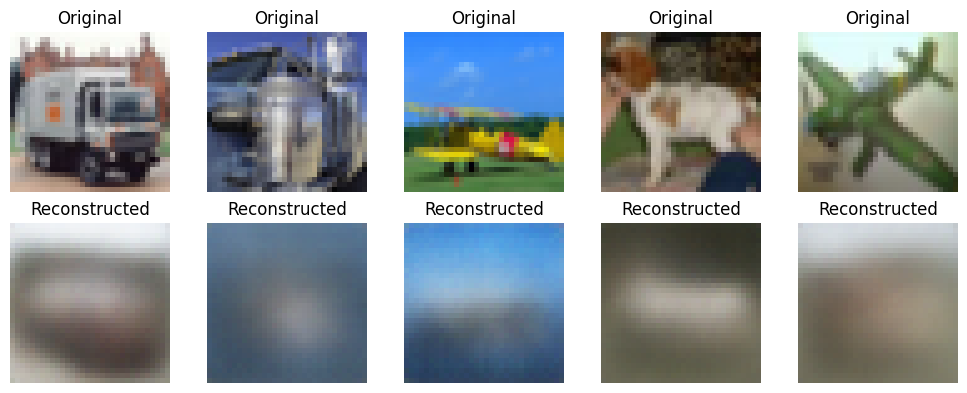

---------------------------------------------------------------------------------------------------
Epoch 32, Mean Test Loss: 5289.0475172297965, Learning Rate: 0.000100, Time: 8.85s


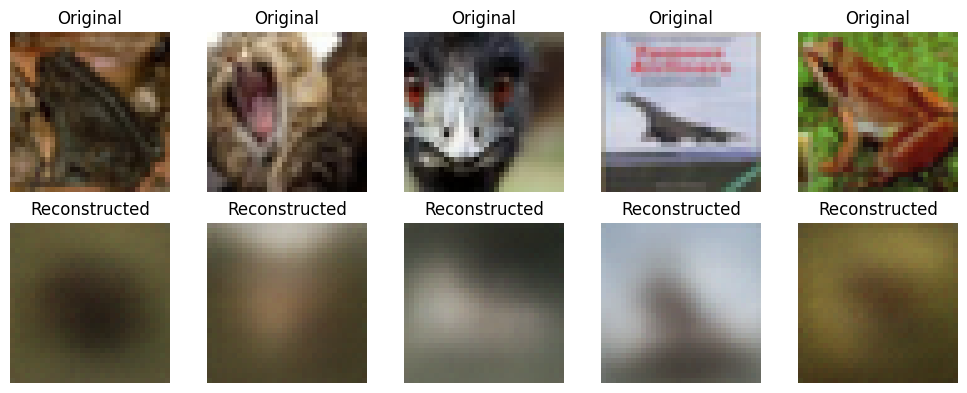

---------------------------------------------------------------------------------------------------
Epoch 33, Mean Test Loss: 5275.406603770651, Learning Rate: 0.000100, Time: 8.83s


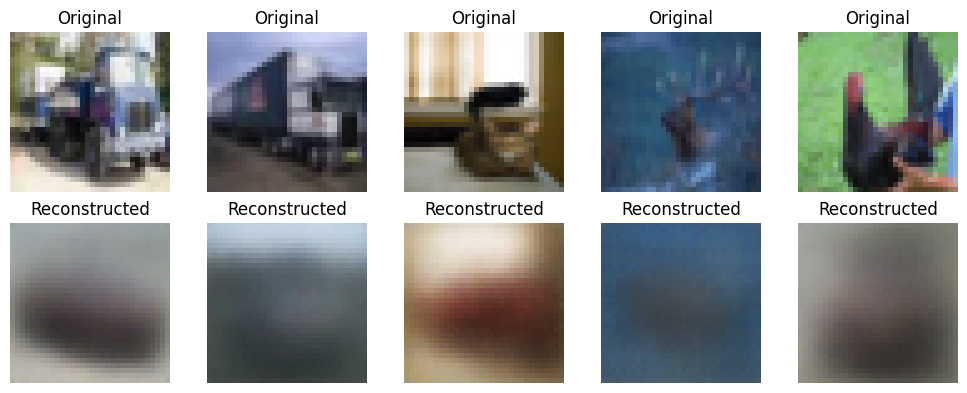

---------------------------------------------------------------------------------------------------
Epoch 34, Mean Test Loss: 5271.167126698099, Learning Rate: 0.000100, Time: 9.00s


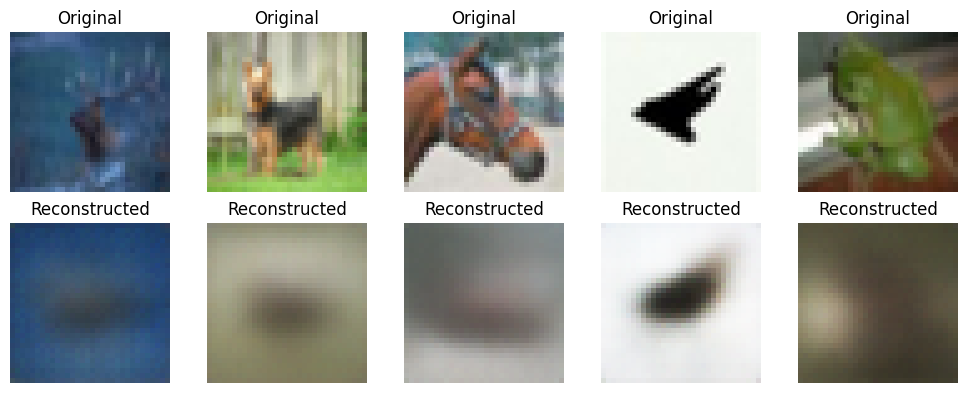

---------------------------------------------------------------------------------------------------
Epoch 35, Mean Test Loss: 5254.2224603154855, Learning Rate: 0.000100, Time: 9.39s


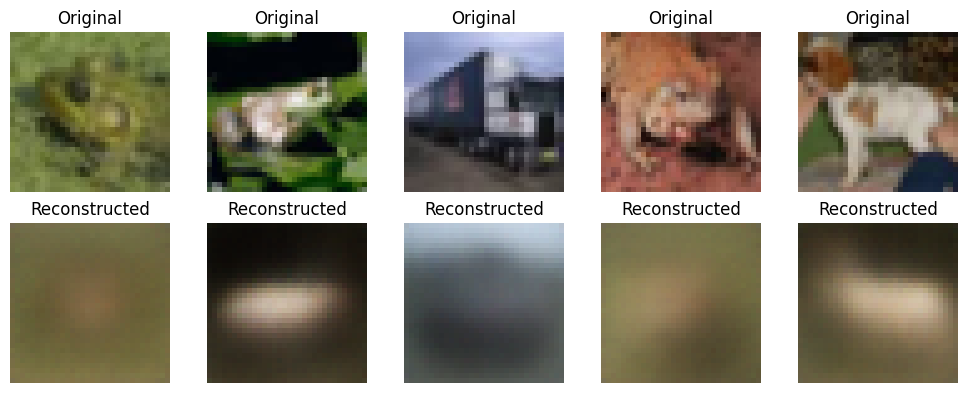

---------------------------------------------------------------------------------------------------
Epoch 36, Mean Test Loss: 5266.697294393163, Learning Rate: 0.000100, Time: 8.86s


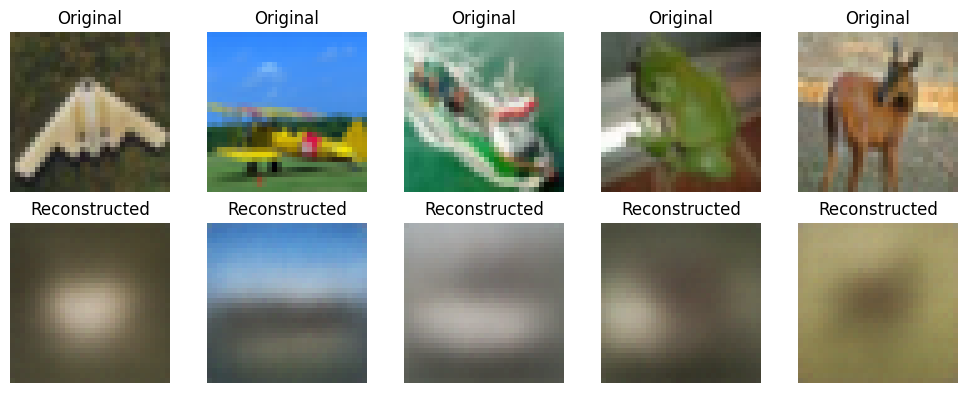

---------------------------------------------------------------------------------------------------
Epoch 37, Mean Test Loss: 5278.765430620521, Learning Rate: 0.000100, Time: 9.50s


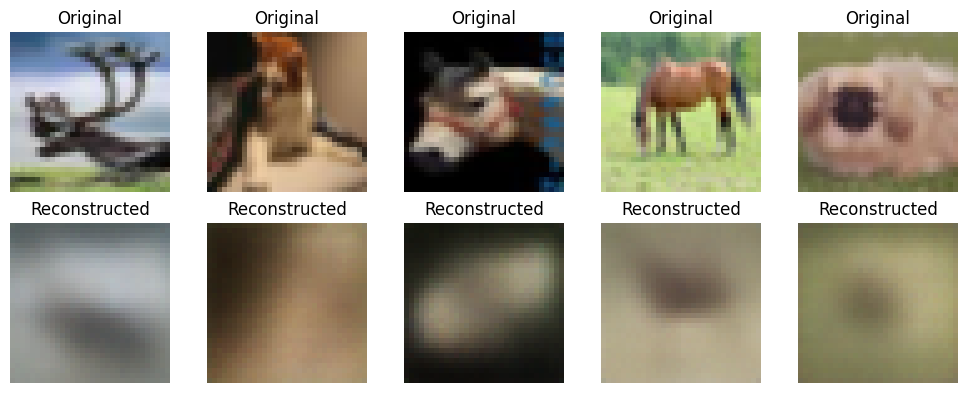

---------------------------------------------------------------------------------------------------
Epoch 38, Mean Test Loss: 5264.122606022343, Learning Rate: 0.000100, Time: 9.25s


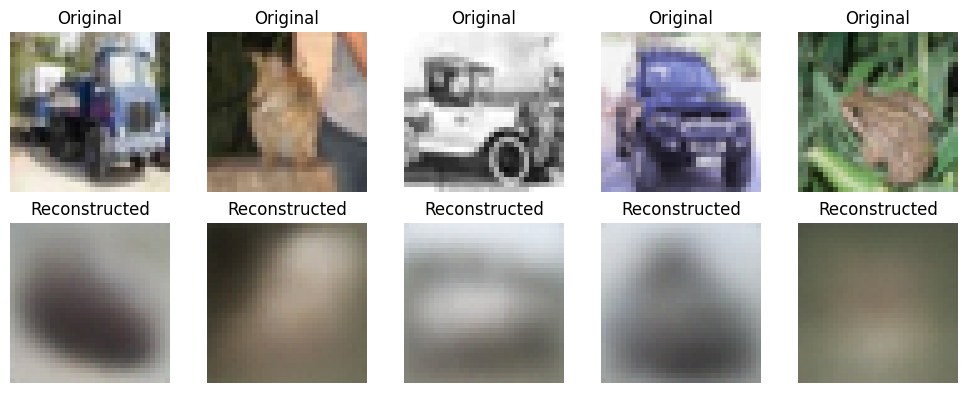

---------------------------------------------------------------------------------------------------
Epoch 39, Mean Test Loss: 5273.296598203623, Learning Rate: 0.000100, Time: 9.46s


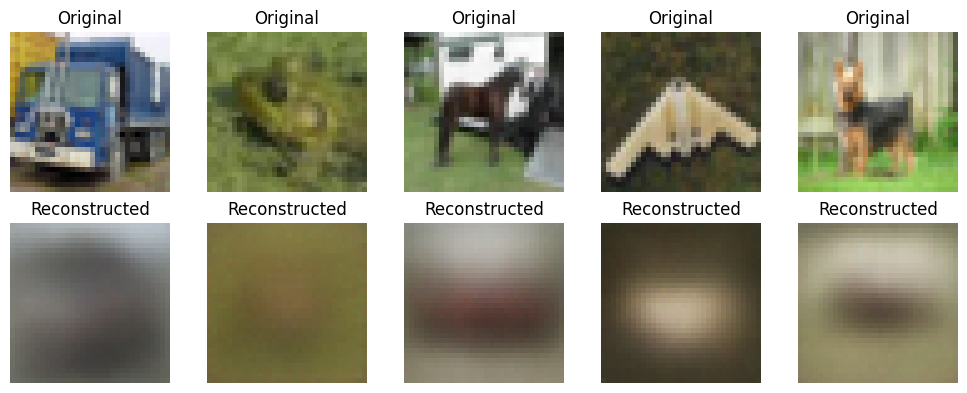

---------------------------------------------------------------------------------------------------
Epoch 40, Mean Test Loss: 5259.238872941132, Learning Rate: 0.000100, Time: 8.76s


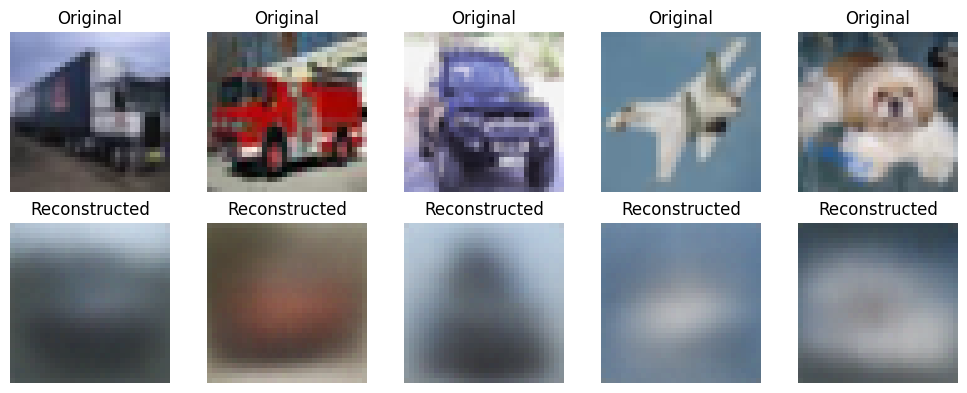

---------------------------------------------------------------------------------------------------
Epoch 41, Mean Test Loss: 5259.62038931877, Learning Rate: 0.000100, Time: 8.91s


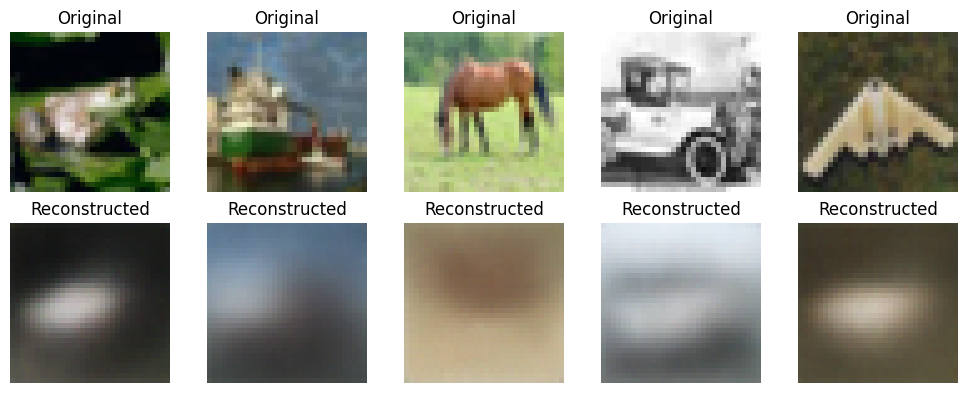

---------------------------------------------------------------------------------------------------
Epoch 42, Mean Test Loss: 5238.508799947751, Learning Rate: 0.000100, Time: 8.78s


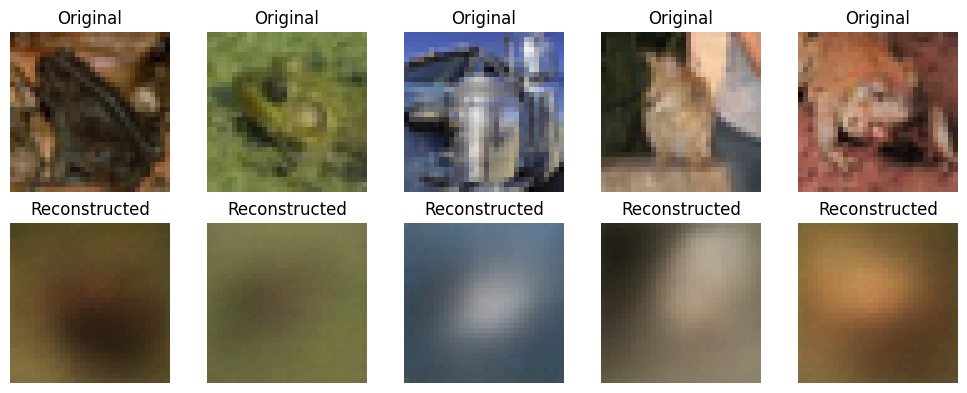

---------------------------------------------------------------------------------------------------
Epoch 43, Mean Test Loss: 5253.48558637291, Learning Rate: 0.000100, Time: 9.15s


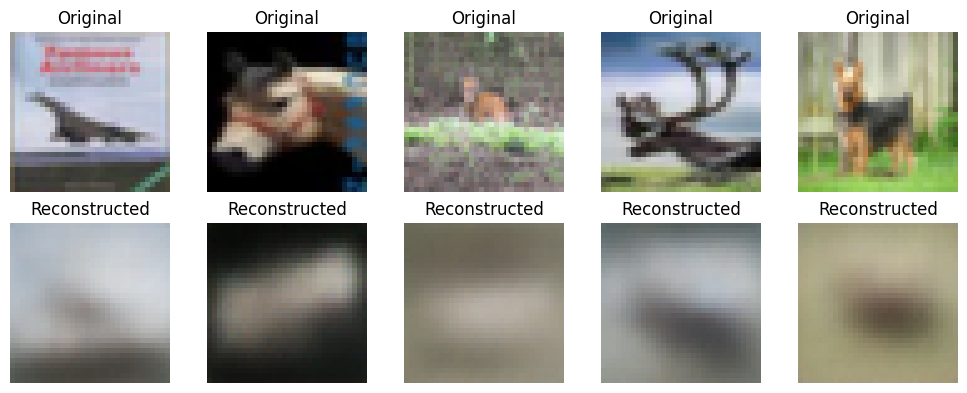

---------------------------------------------------------------------------------------------------
Epoch 44, Mean Test Loss: 5268.620974012241, Learning Rate: 0.000100, Time: 9.05s


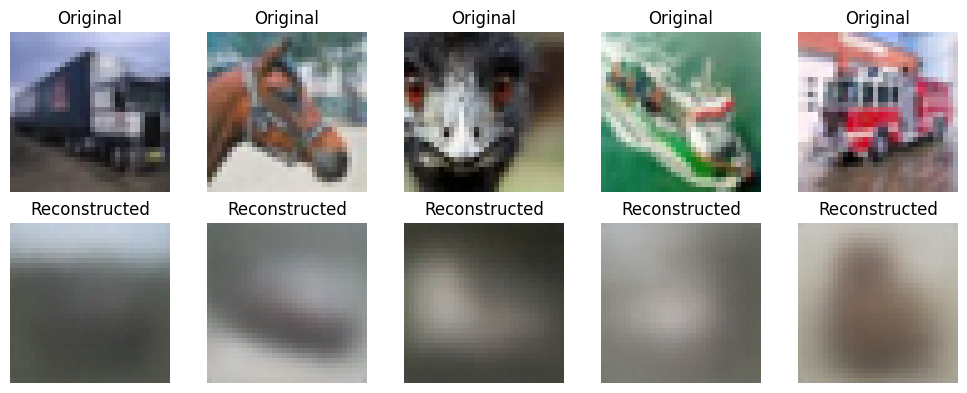

---------------------------------------------------------------------------------------------------
Epoch 45, Mean Test Loss: 5251.796958971935, Learning Rate: 0.000100, Time: 9.28s


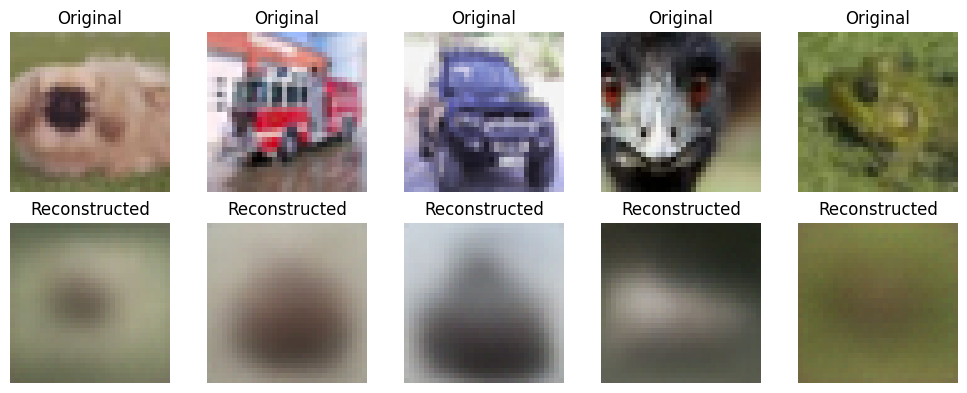

---------------------------------------------------------------------------------------------------
Epoch 46, Mean Test Loss: 5232.181846667248, Learning Rate: 0.000100, Time: 9.16s


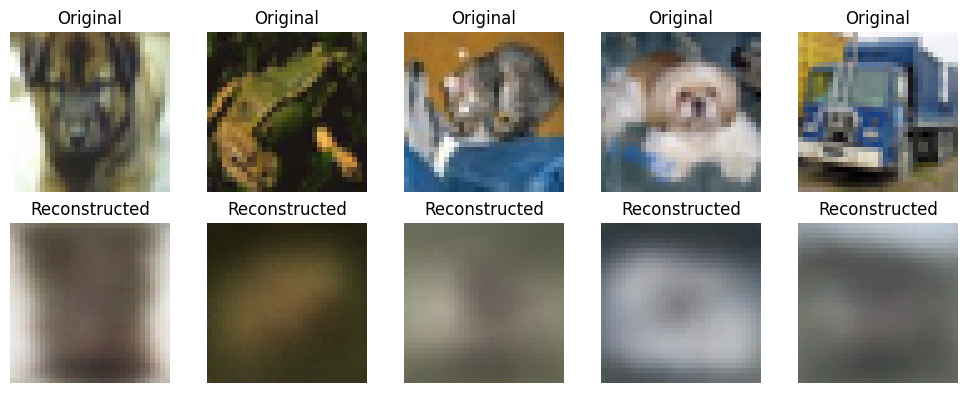

---------------------------------------------------------------------------------------------------
Epoch 47, Mean Test Loss: 5233.566319945511, Learning Rate: 0.000100, Time: 8.84s


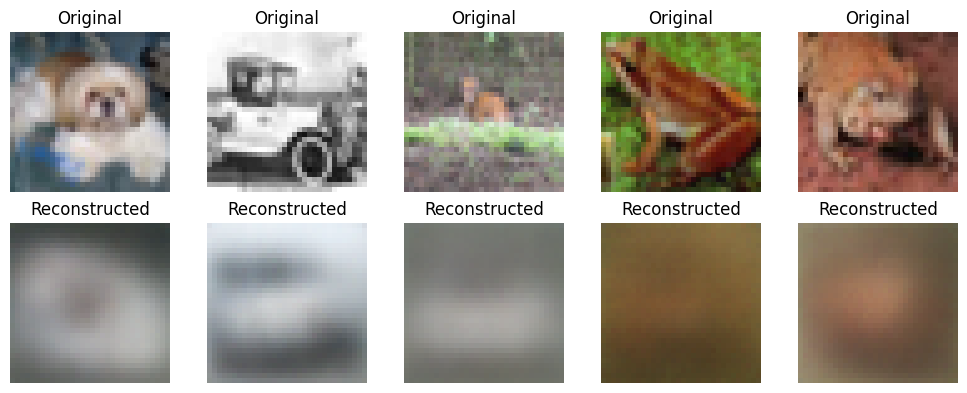

---------------------------------------------------------------------------------------------------
Epoch 48, Mean Test Loss: 5238.993083200637, Learning Rate: 0.000100, Time: 8.97s


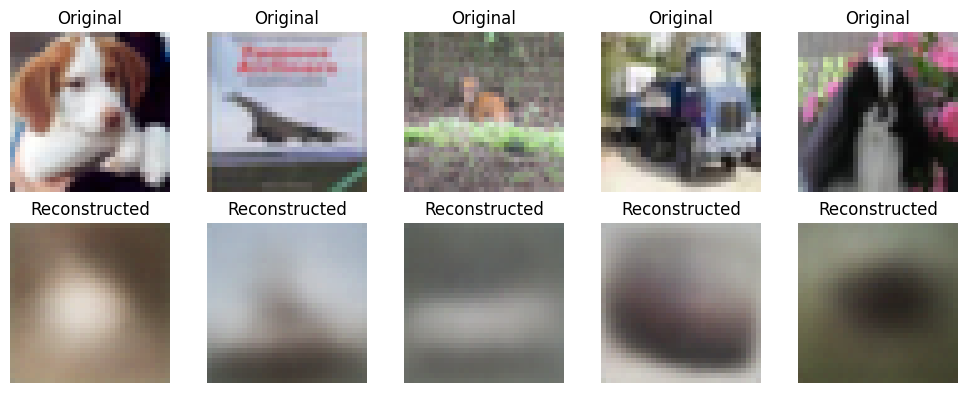

---------------------------------------------------------------------------------------------------
Epoch 49, Mean Test Loss: 5224.063000721537, Learning Rate: 0.000100, Time: 9.54s


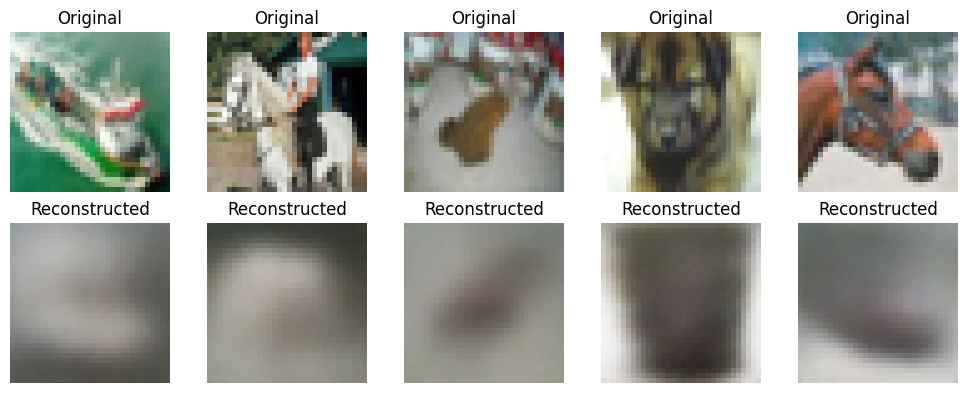

---------------------------------------------------------------------------------------------------
Epoch 50, Mean Test Loss: 5222.603885723527, Learning Rate: 0.000100, Time: 8.93s


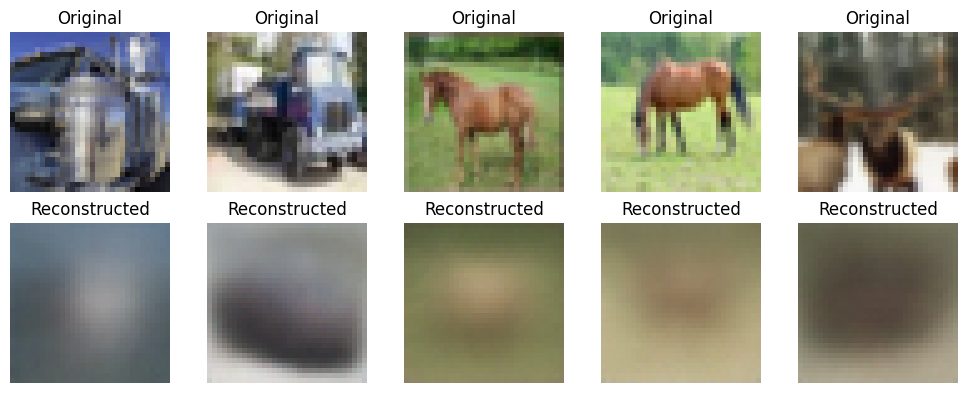

---------------------------------------------------------------------------------------------------
Epoch 51, Mean Test Loss: 5222.99072265625, Learning Rate: 0.000100, Time: 8.99s


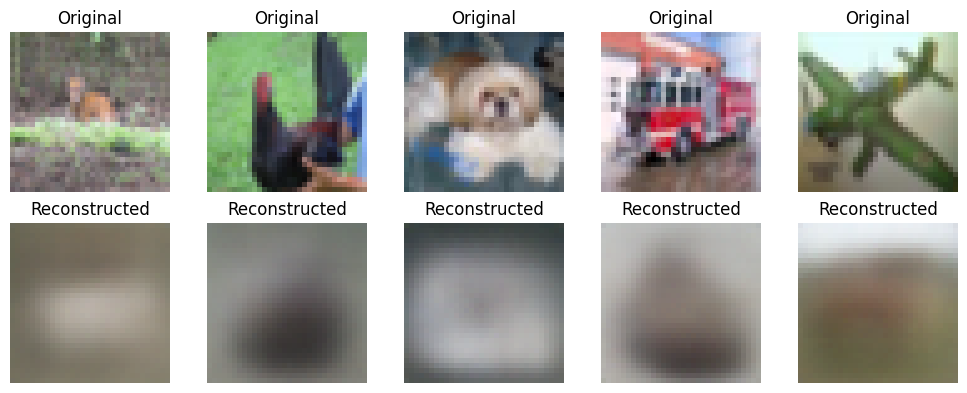

---------------------------------------------------------------------------------------------------
Epoch 52, Mean Test Loss: 5270.546587318372, Learning Rate: 0.000100, Time: 8.89s


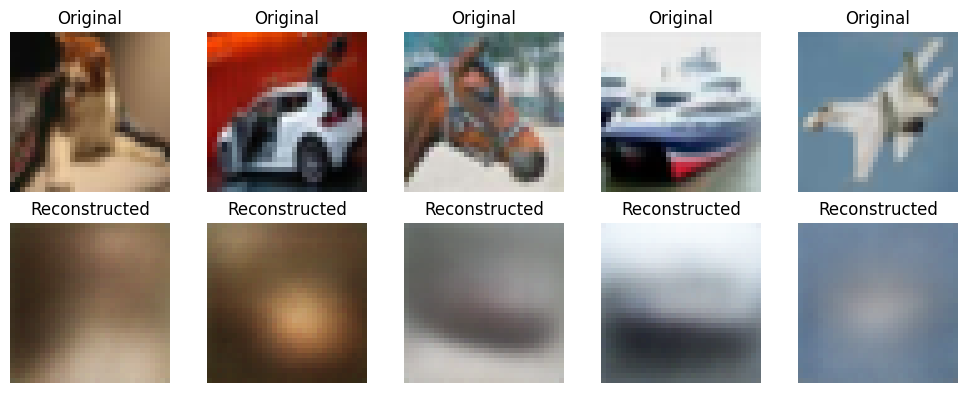

---------------------------------------------------------------------------------------------------
Epoch 53, Mean Test Loss: 5217.381283122263, Learning Rate: 0.000100, Time: 9.08s


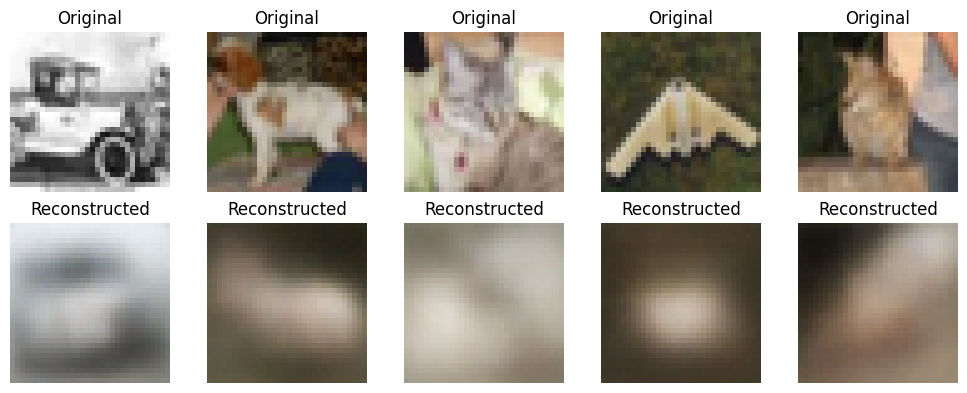

---------------------------------------------------------------------------------------------------
Epoch 54, Mean Test Loss: 5217.200766010649, Learning Rate: 0.000100, Time: 9.18s


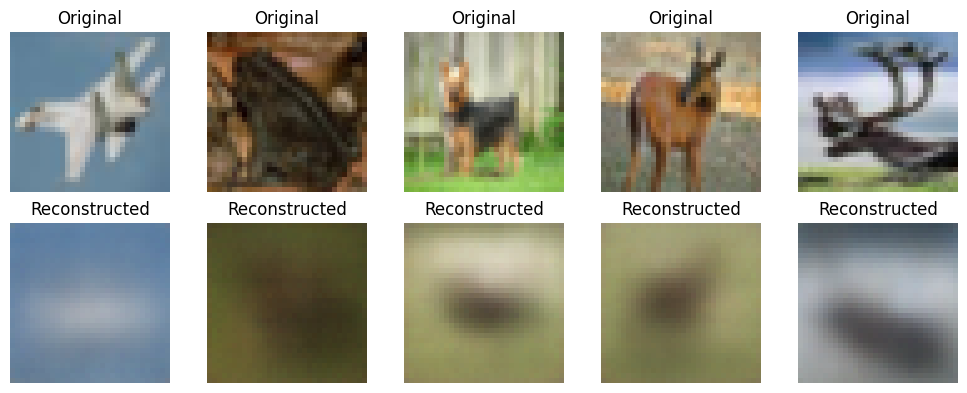

---------------------------------------------------------------------------------------------------
Epoch 55, Mean Test Loss: 5222.802723489749, Learning Rate: 0.000100, Time: 9.59s


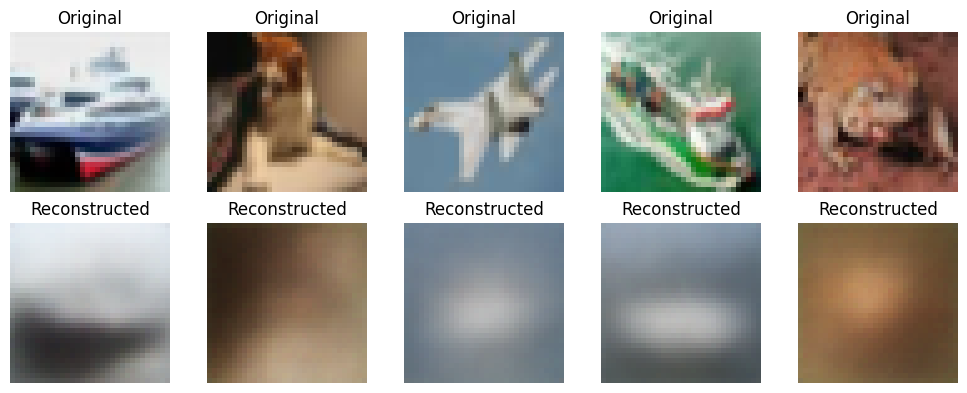

---------------------------------------------------------------------------------------------------
Epoch 56, Mean Test Loss: 5217.09255728752, Learning Rate: 0.000100, Time: 8.92s


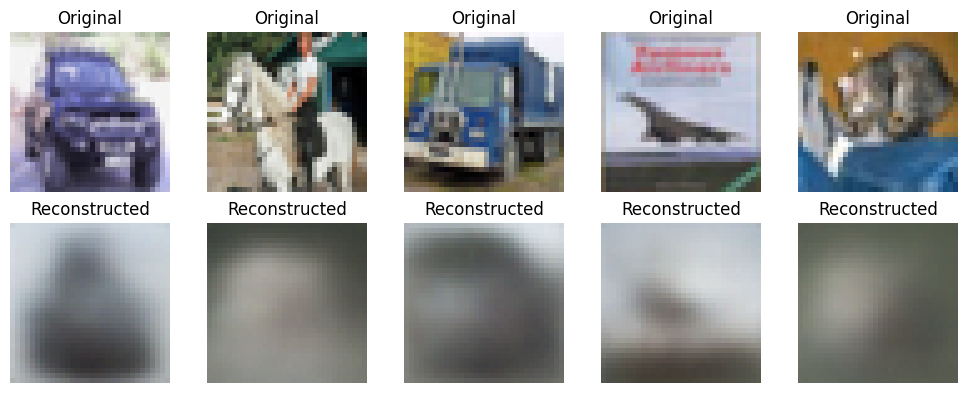

---------------------------------------------------------------------------------------------------
Epoch 57, Mean Test Loss: 5213.792546557773, Learning Rate: 0.000100, Time: 8.95s


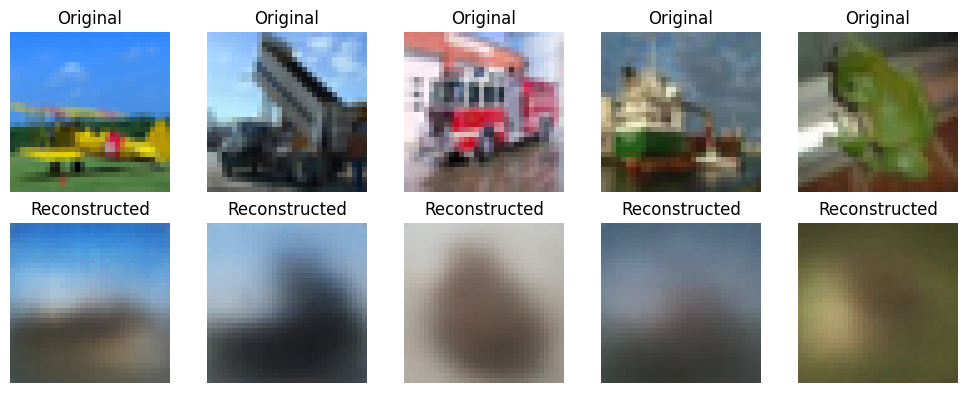

---------------------------------------------------------------------------------------------------
Epoch 58, Mean Test Loss: 5222.128546259206, Learning Rate: 0.000100, Time: 9.21s


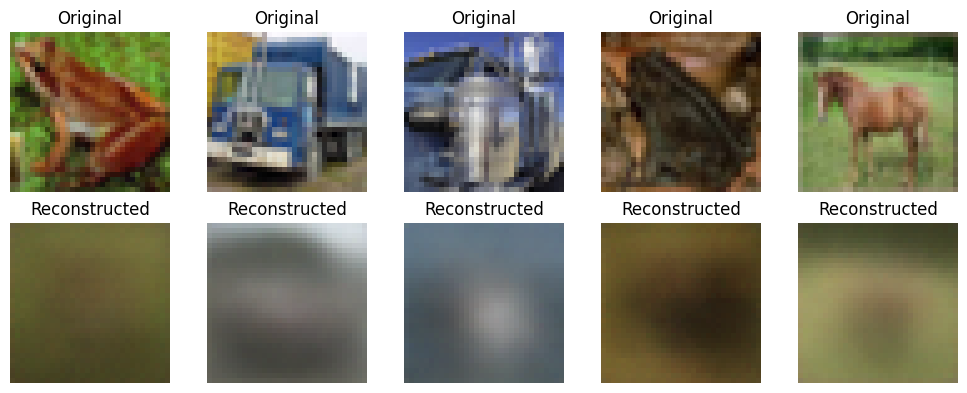

---------------------------------------------------------------------------------------------------
Epoch 59, Mean Test Loss: 5235.464605829518, Learning Rate: 0.000100, Time: 9.10s


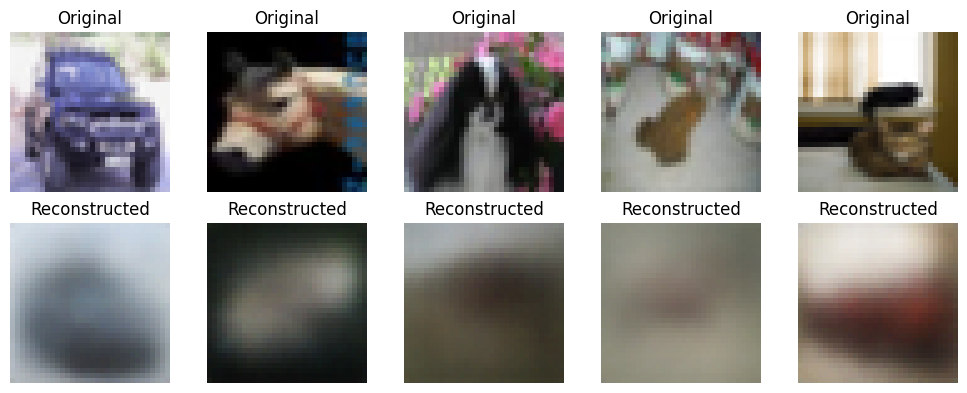

---------------------------------------------------------------------------------------------------
Epoch 60, Mean Test Loss: 5223.123928580315, Learning Rate: 0.000100, Time: 9.72s


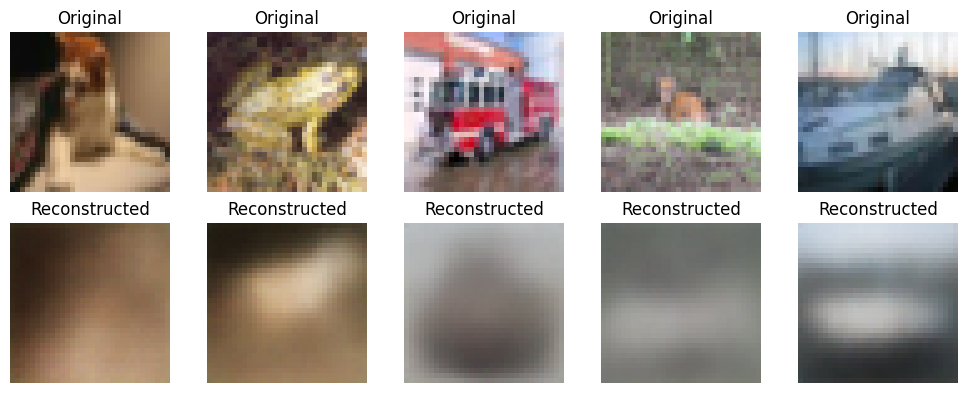

---------------------------------------------------------------------------------------------------
Epoch 61, Mean Test Loss: 5232.176790468252, Learning Rate: 0.000100, Time: 9.07s


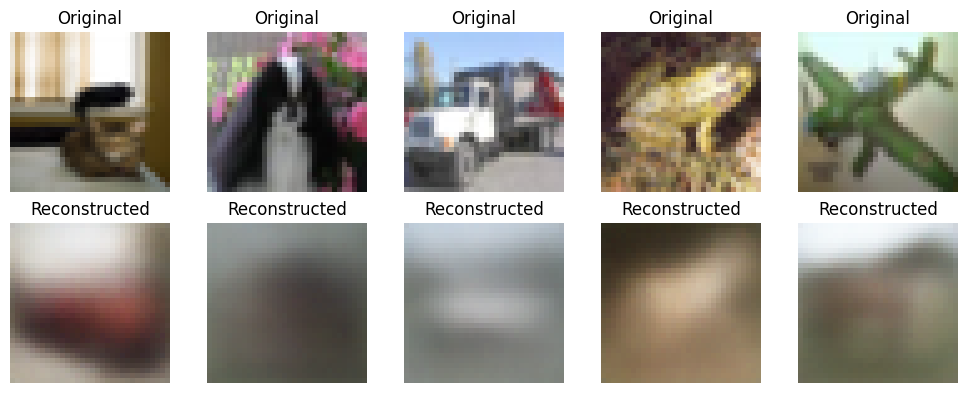

---------------------------------------------------------------------------------------------------
Epoch 62, Mean Test Loss: 5234.172205445114, Learning Rate: 0.000100, Time: 9.10s


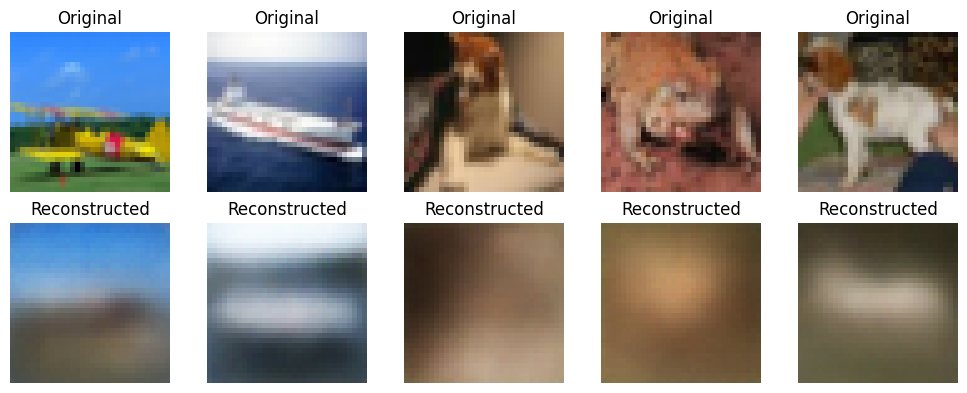

---------------------------------------------------------------------------------------------------
Epoch 63, Mean Test Loss: 5217.487391769507, Learning Rate: 0.000100, Time: 9.04s


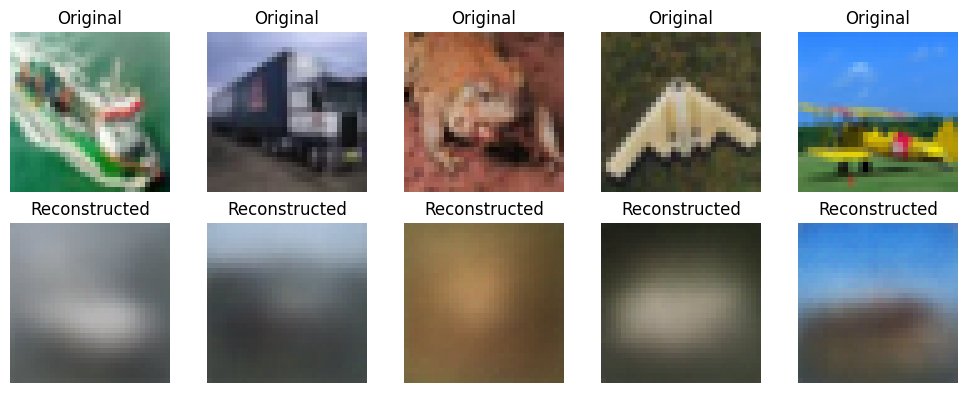

---------------------------------------------------------------------------------------------------
Epoch 64, Mean Test Loss: 5220.2599405665305, Learning Rate: 0.000100, Time: 9.49s


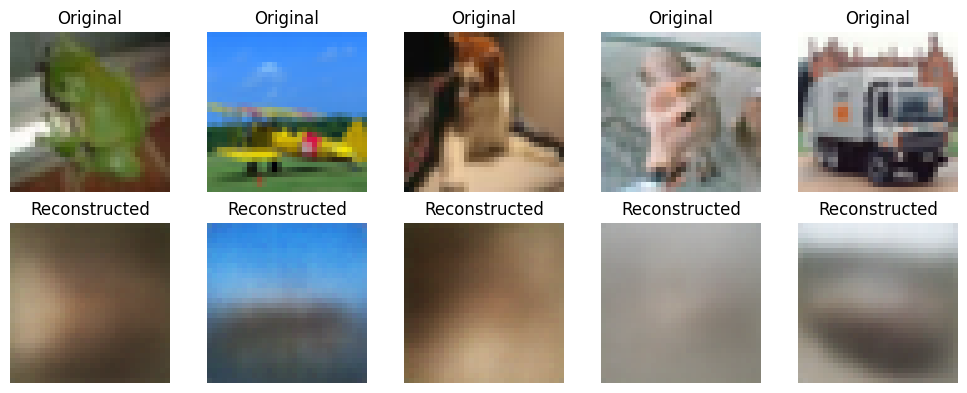

---------------------------------------------------------------------------------------------------
Epoch 65, Mean Test Loss: 5206.0826206085785, Learning Rate: 0.000100, Time: 9.07s


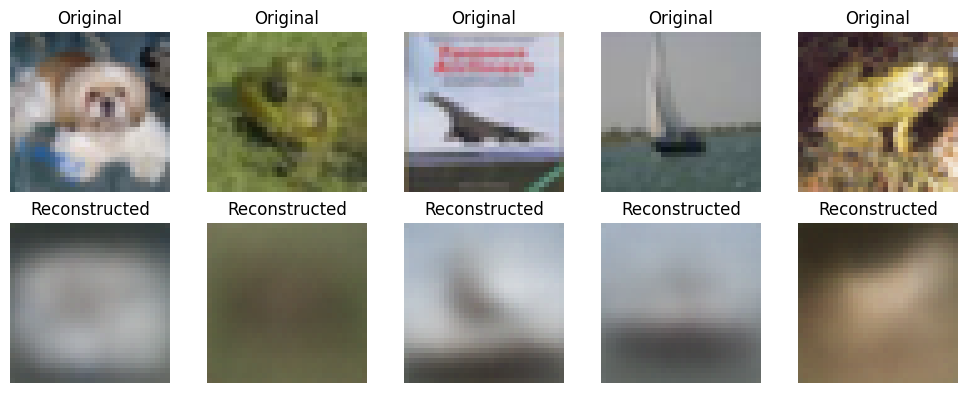

---------------------------------------------------------------------------------------------------
Epoch 66, Mean Test Loss: 5217.544617865496, Learning Rate: 0.000100, Time: 9.33s


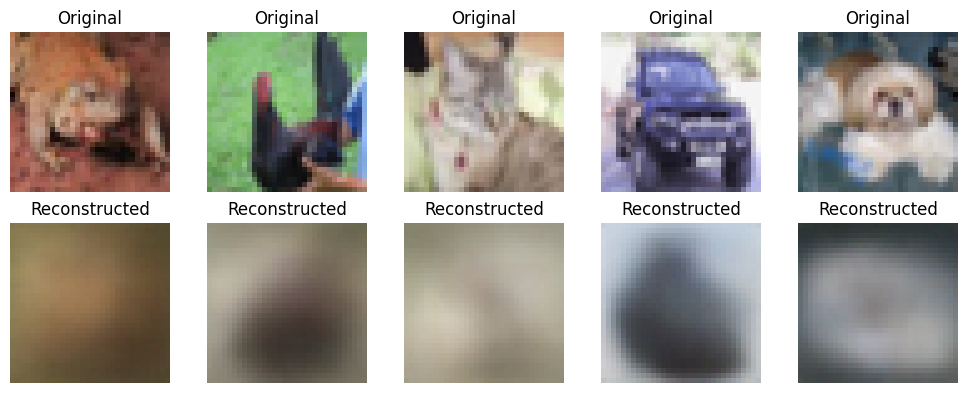

---------------------------------------------------------------------------------------------------
Epoch 67, Mean Test Loss: 5201.551648959992, Learning Rate: 0.000100, Time: 9.11s


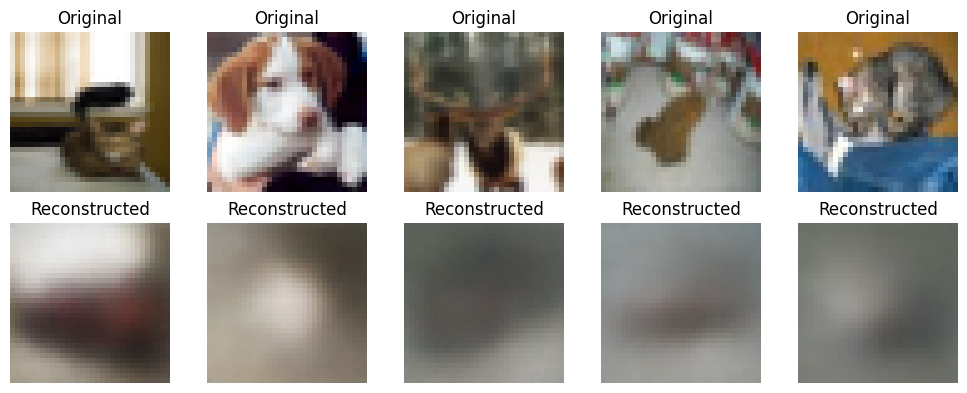

---------------------------------------------------------------------------------------------------
Epoch 68, Mean Test Loss: 5216.878822278065, Learning Rate: 0.000100, Time: 9.59s


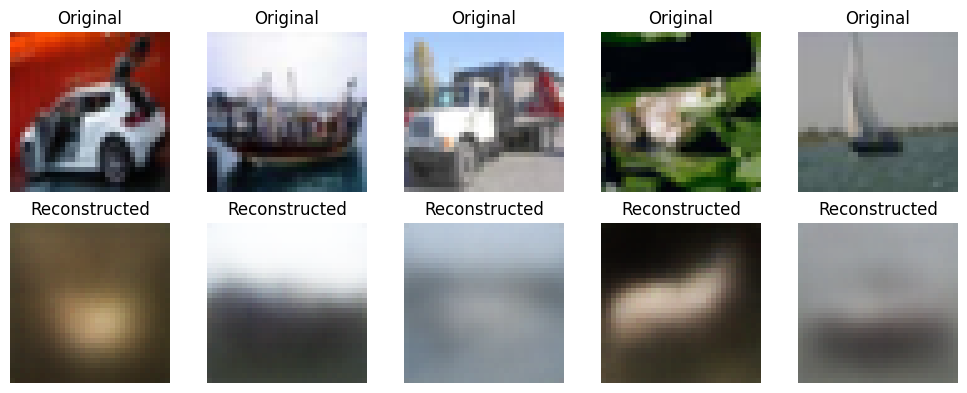

---------------------------------------------------------------------------------------------------
Epoch 69, Mean Test Loss: 5226.303668174015, Learning Rate: 0.000100, Time: 9.02s


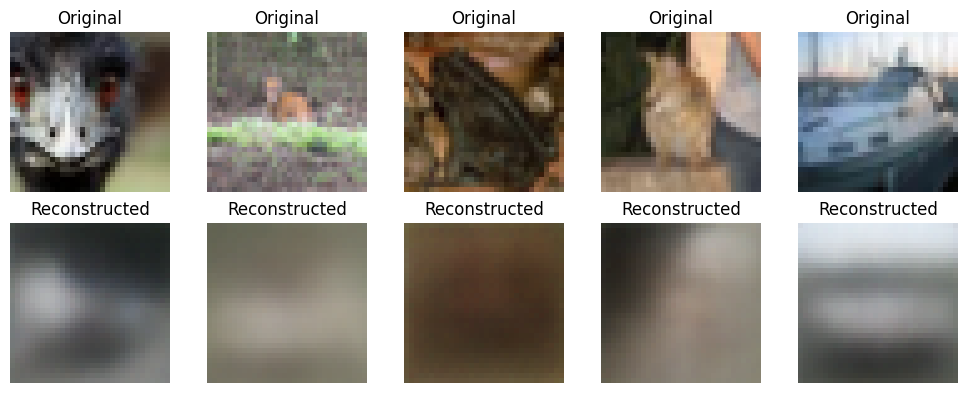

---------------------------------------------------------------------------------------------------
Epoch 70, Mean Test Loss: 5202.098626592357, Learning Rate: 0.000100, Time: 9.19s


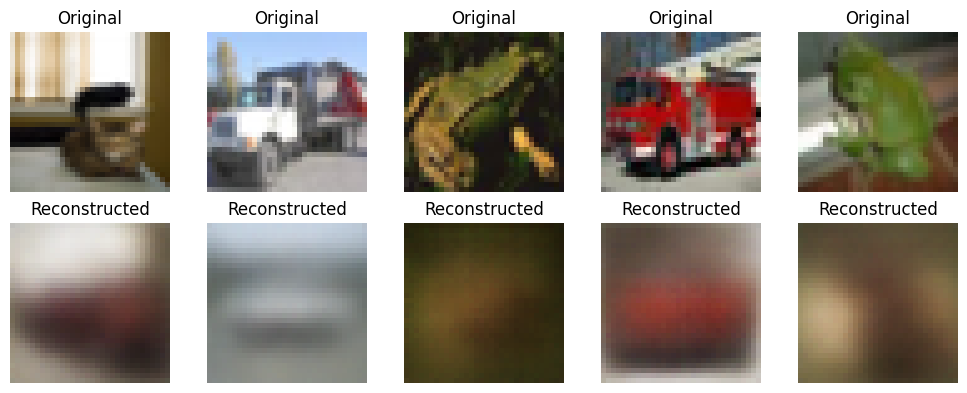

---------------------------------------------------------------------------------------------------
Epoch 71, Mean Test Loss: 5207.74732378334, Learning Rate: 0.000100, Time: 9.09s


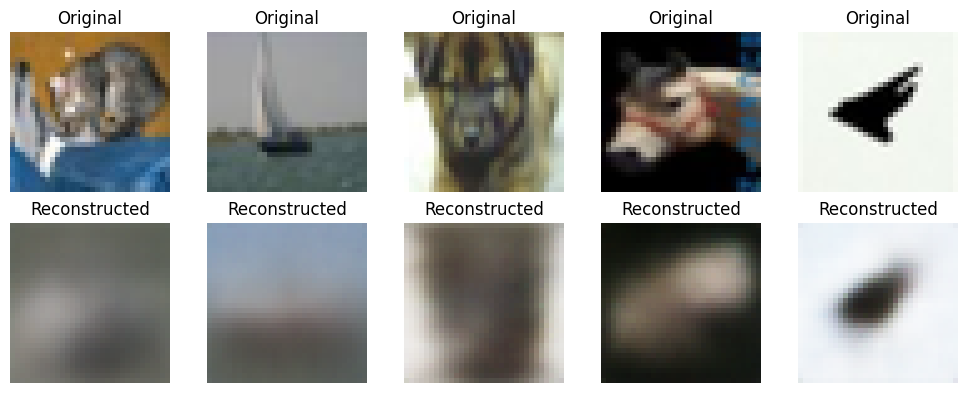

---------------------------------------------------------------------------------------------------
Epoch 72, Mean Test Loss: 5204.7708001592355, Learning Rate: 0.000100, Time: 9.60s


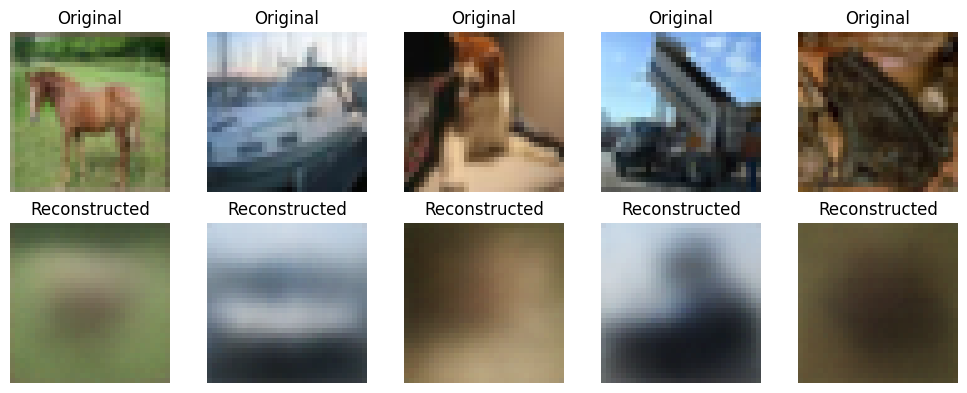

---------------------------------------------------------------------------------------------------
Epoch 73, Mean Test Loss: 5203.895717742337, Learning Rate: 0.000100, Time: 9.10s


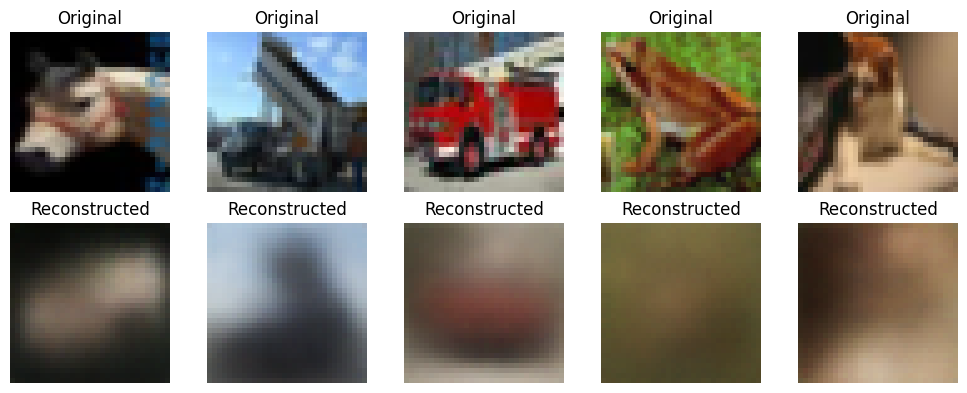

---------------------------------------------------------------------------------------------------
Epoch 74, Mean Test Loss: 5207.065510549363, Learning Rate: 0.000100, Time: 9.11s


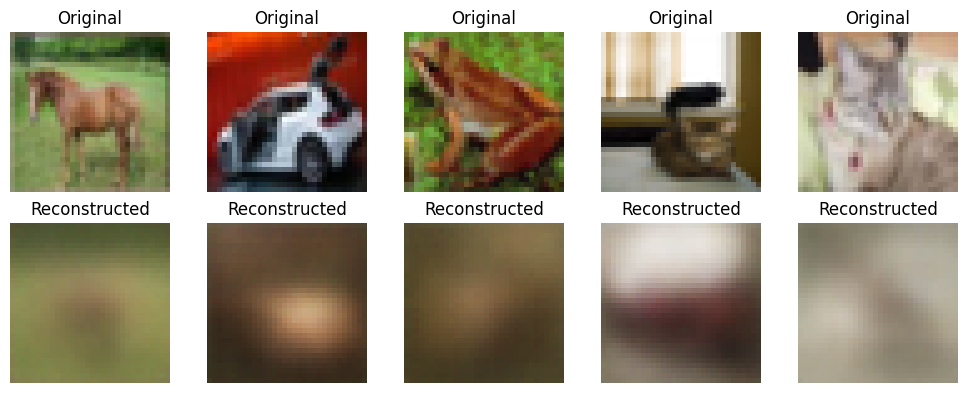

---------------------------------------------------------------------------------------------------
Epoch 75, Mean Test Loss: 5194.212602165854, Learning Rate: 0.000100, Time: 9.11s


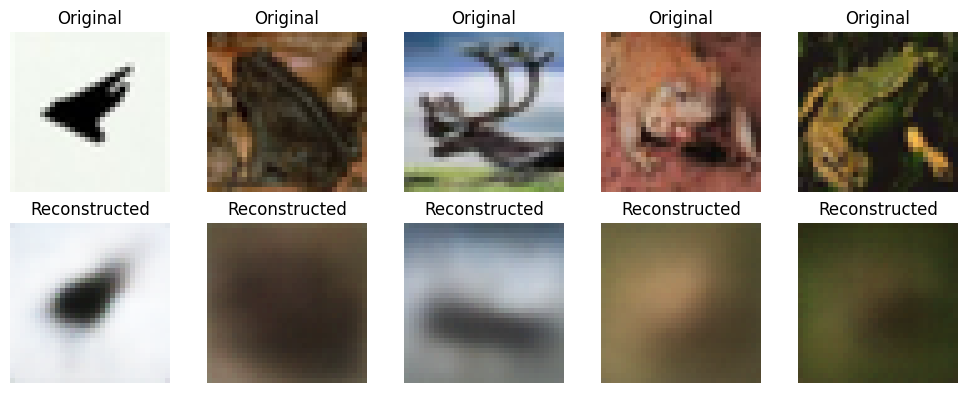

---------------------------------------------------------------------------------------------------


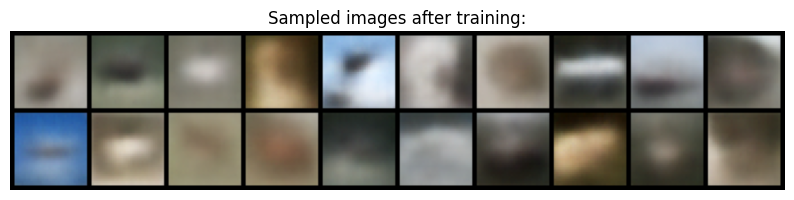

In [5]:
# We want to plot training and testing losses at the end of training
train_losses = []
test_losses = []
learning_rates = []

# Training loop
for epoch in range(num_epochs):
  model.train()
  epoch_start_time = time.time()

  for _, (data, _) in enumerate(train_loader):
    data = data.to(device)
    optimizer.zero_grad()

    with torch.cuda.amp.autocast():
      # Forward pass
      recon_batch, mu, logvar = model(data)

      # Compute loss
      loss = loss_function(recon_batch, data, mu, logvar)
      train_losses.append(loss)

    # Backward pass
    scaler.scale(loss).backward()

    # Optimization step
    scaler.step(optimizer)
    scaler.update()

    # Ivan: add logging here

  # Step the learning rate scheduler
  if scheduler is not None:
    lr = scheduler.get_last_lr()[0]
    scheduler.step()
  else:
    lr = learning_rate
  learning_rates.append(lr)

  # After the epoch, evaluate the accuracy on the test dataset
  mean_loss = evaluate(model, test_loader, loss_function, device)
  test_losses.append(mean_loss)

  elapsed_time = time.time() - epoch_start_time
  print(f'Epoch {epoch + 1}, Mean Test Loss: {mean_loss}, Learning Rate: {lr:.6f}, Time: {elapsed_time:.2f}s')

  # Generate and log test images after each epoch
  plot_reconstruction(model, test_loader, device, num_samples=5)
  print('---------------------------------------------------------------------------------------------------')

# Ivan: add plots here

# Sample some VAE-generated images
sample(model, device, latent_dim, num_samples=50)